In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/NHANES.csv')

In [3]:
#function for 95% CI
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [4]:
def CI_prop_diff(s1, s2, n1, n2):
    p1 = s1 / n1
    p2 = s2 / n2
    se2p1 = p1 * (1 - p1) / n1
    se2p2 = p2 * (1 - p2) / n2
    se2 = se2p1 + se2p2
    se = np.sqrt(se2)
    low = (p1 - p2) - 1.96 * se
    up = (p1 - p2) + 1.96 * se
    print("Proportion difference is:", p1 - p2)
    print("95% CI is: ({}, {})".format(low, up))

In [5]:
df = pd.read_csv('Data/NHANES.csv')
df = df.dropna(subset=['BMI'])
df

,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,...,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregntNow
0,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
1,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
2,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
3,51625,2009_10,male,4,0-9,49.0,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51630,2009_10,female,49,40-49,596.0,White,NaN,Some College,LivePartner,...,No,NaN,Yes,Yes,12.0,10.0,1.0,Yes,Heterosexual,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,71909,2011_12,male,28,20-29,NaN,Mexican,Mexican,9 - 11th Grade,NeverMarried,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9995,71909,2011_12,male,28,20-29,NaN,Mexican,Mexican,9 - 11th Grade,NeverMarried,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,71911,2011_12,male,27,20-29,NaN,Mexican,Mexican,College Grad,Married,...,No,NaN,No,Yes,21.0,1.0,1.0,No,Heterosexual,NaN
9998,71915,2011_12,male,60,60-69,NaN,White,White,College Grad,NeverMarried,...,NaN,NaN,No,Yes,19.0,2.0,NaN,No,NaN,NaN


In [6]:
def BMI(row): 
    if row['BMI'] < 18.5: 
        return 'Underweight'
    elif row['BMI'] < 25: 
        return 'Normal'
    elif row['BMI'] < 30: 
        return 'Overweight'
    elif row['BMI'] >= 30: 
        return 'Obese'


In [7]:
df['BMI Levels'] = df.apply(BMI, axis = 1)

In [8]:
df['BMI Levels'].value_counts()

Normal         2941
Obese          2766
Overweight     2656
Underweight    1271
Name: BMI Levels, dtype: int64

In [9]:
df['BMI Levels'].count()

9634

In [10]:
table = pd.crosstab(index=df["BMI Levels"], columns=df["Race3"])
table

Race3,Asian,Black,Hispanic,Mexican,Other,White
BMI Levels,,,,,,
Normal,130,135,86,122,46,974
Obese,29,207,93,131,40,851
Overweight,72,131,105,119,34,858
Underweight,46,95,56,80,30,364


In [11]:

table = table.reindex(['Underweight','Normal','Overweight','Obese'])
table



Race3,Asian,Black,Hispanic,Mexican,Other,White
BMI Levels,,,,,,
Underweight,46,95,56,80,30,364
Normal,130,135,86,122,46,974
Overweight,72,131,105,119,34,858
Obese,29,207,93,131,40,851


In [12]:
95+135+131+207

568

In [13]:
80+122+119+131

452

In [14]:
probability = table/table.sum()
probability
probability.to_csv('Data/D1')
table.to_csv('Data/D2')
probability

Race3,Asian,Black,Hispanic,Mexican,Other,White
BMI Levels,,,,,,
Underweight,0.166065,0.167254,0.164706,0.176991,0.200000,0.119462
Normal,0.469314,0.237676,0.252941,0.269912,0.306667,0.319659
Overweight,0.259928,0.230634,0.308824,0.263274,0.226667,0.281588
Obese,0.104693,0.364437,0.273529,0.289823,0.266667,0.279291


In [15]:
dc = pd.read_csv('Data/D1')
dc.index = dc['BMI Levels']
dc = dc[['Asian','Black','Hispanic', 'Mexican', 'Other', 'White',]]
dc

,Asian,Black,Hispanic,Mexican,Other,White
BMI Levels,,,,,,
Underweight,0.166065,0.167254,0.164706,0.176991,0.200000,0.119462
Normal,0.469314,0.237676,0.252941,0.269912,0.306667,0.319659
Overweight,0.259928,0.230634,0.308824,0.263274,0.226667,0.281588
Obese,0.104693,0.364437,0.273529,0.289823,0.266667,0.279291


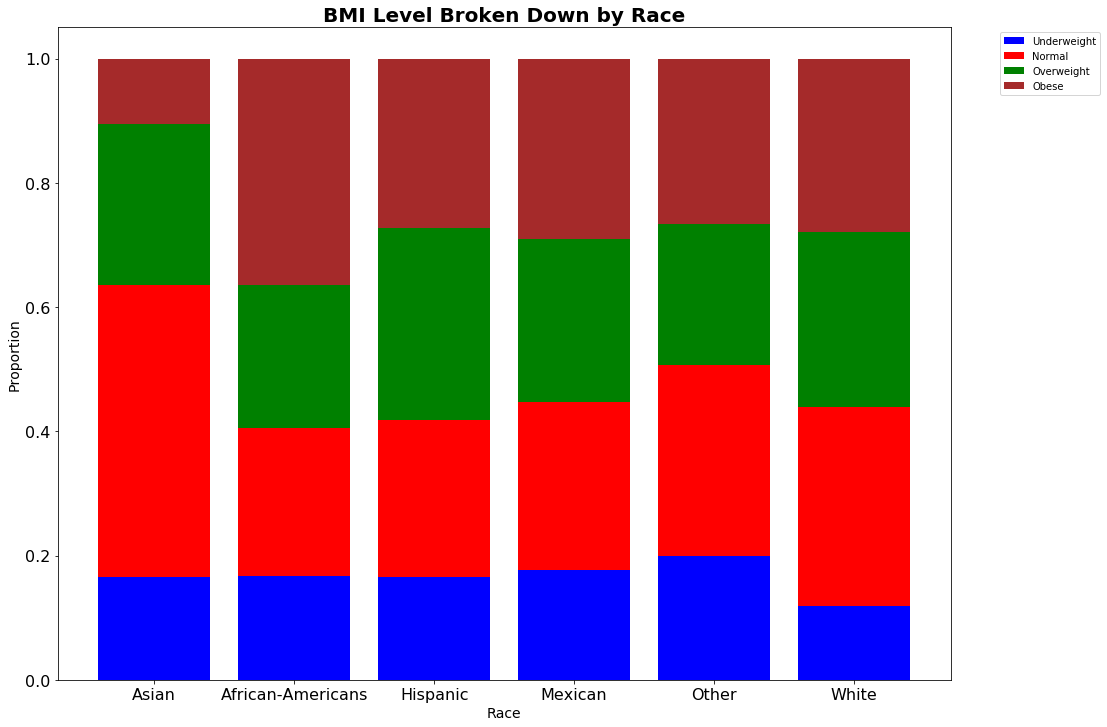

In [16]:
label = ['Asian','African-Americans','Hispanic', 'Mexican', 'Other', 'White',]
y_value1 = dc.loc['Underweight']
y_value2 = dc.loc['Normal']
y_value3 = dc.loc['Overweight']
y_value4 = dc.loc['Obese']


fig, axs = plt.subplots(figsize=(16,12)) # Change the figure size here       
p1 = axs.bar(label, y_value1, color='blue')     
p2 = axs.bar(label, y_value2, color='red', bottom=y_value1)
p3 = axs.bar(label, y_value3, color='green', bottom=y_value1+y_value2)
p4 = axs.bar(label, y_value4, color='brown', bottom=y_value1+y_value2+ y_value3)

axs.set_title("BMI Level Broken Down by Race", fontsize=20, fontweight="bold")   
axs.set_xlabel("Race", fontsize=14)
axs.set_ylabel("Proportion", fontsize=14)
axs.tick_params(labelsize=16)  
axs.legend((p1[0],p2[0],p3[0], p4[0]),('Underweight', 'Normal', 'Overweight', 'Obese'),
          bbox_to_anchor=(1.05, 1))
plt.show() 

In [17]:
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(table)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

chi2: 115.59218296702072
p: 1.3504244814850841e-17
dof: 15
expected: [[ 38.44993794  78.84319404  47.19486967  62.74141498  20.82126603
  422.94931734]
 [ 85.55254448 175.42904427 105.0103434  139.60198593  46.32809268
  941.07798924]
 [ 75.58191974 154.98386429  92.77203144 123.33223004  40.9288374
  831.40111709]
 [ 77.41559785 158.74389739  95.02275548 126.32436905  41.92180389
  851.57157633]]


In [18]:
# obesity difference between African Americans and Asians.
CI_prop_diff(s1= 207,s2=29,n1=568,n2=277)

Proportion difference is: 0.25974347892408606
95% CI is: (0.20620387537775775, 0.31328308247041436)


In [19]:
# obesity difference between African Americans and Mexicans
CI_prop_diff(s1= 207,s2=131,n1=568,n2=452)

Proportion difference is: 0.07461361086875234
95% CI is: (0.01702986966533898, 0.1321973520721657)


In [20]:
"""
A chi-square test of independence was performed to examine the relation between race and obesity. 
The relation between these variables was significant, X2 (15, N = 9634) = 115.6, p = 1.4E-17. 
Of all races, African-Americans were more likely to be obese. 


"""

'\nA chi-square test of independence was performed to examine the relation between race and obesity. \nThe relation between these variables was significant, X2 (15, N = 9634) = 115.6, p = 1.4E-17. \nOf all races, African-Americans were more likely to be obese. \n\n\n'

In [21]:
df['BMI Levels'].count()

9634

In [22]:
 #Based on the statistical analysis of the chi-squared test for indipendence, there is an association between obesity levels and race (p <0.001)
# (Chi^2(20), N = 4834); p < 0.001
df = df.dropna(subset=['HHIncomeMid', 'BMI' ])

In [23]:
from scipy import stats
corr = stats.pearsonr(df['HHIncomeMid'], df['BMI'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])

Correlation coefficient: -0.06354937675983953
p-value: 2.1738634496769e-09


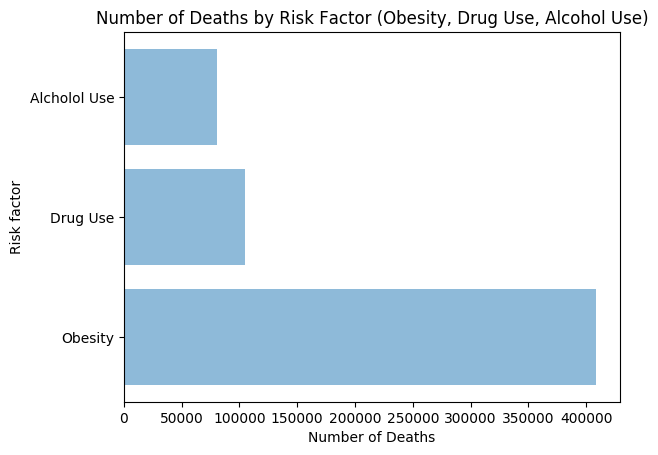

In [24]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Obesity', 'Drug Use', 'Alcholol Use')
y_pos = np.arange(len(objects))
deaths = [408831,104937, 80986]

plt.barh(y_pos, deaths, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Deaths')
plt.title('Number of Deaths by Risk Factor (Obesity, Drug Use, Alcohol Use)')
plt.ylabel('Risk factor')

plt.show()

In [25]:
df['HHIncomeMid']

0       30000.0
1       30000.0
2       30000.0
3       22500.0
4       40000.0
         ...   
9994     7500.0
9995     7500.0
9997    87500.0
9998    70000.0
9999    70000.0
Name: HHIncomeMid, Length: 8852, dtype: float64

In [26]:
def income(row): 
    if row['HHIncomeMid'] < 28000:
        return 'Low income tier'
    elif row['HHIncomeMid'] < 84000:
        return 'Middle income tier'
    
    elif row['HHIncomeMid'] > 84000 :
        return 'Upper income tier'


In [27]:
df['Income Levels'] = df.apply(income, axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df['Income Levels'].value_counts()

Middle income tier    3623
Upper income tier     3199
Low income tier       2030
Name: Income Levels, dtype: int64

In [29]:
table_2 = pd.crosstab(index=df["Income Levels"], columns=df["Race3"])
table_2

Race3,Asian,Black,Hispanic,Mexican,Other,White
Income Levels,,,,,,
Low income tier,46,195,118,144,54,520
Middle income tier,78,204,121,194,54,1100
Upper income tier,114,97,71,60,35,1267


In [30]:
probability_2 = table_2/table_2.sum()
probability_2
probability_2.to_csv('Data/D3')
table.to_csv('Data/D4')
probability_2

Race3,Asian,Black,Hispanic,Mexican,Other,White
Income Levels,,,,,,
Low income tier,0.193277,0.393145,0.380645,0.361809,0.377622,0.180118
Middle income tier,0.327731,0.411290,0.390323,0.487437,0.377622,0.381018
Upper income tier,0.478992,0.195565,0.229032,0.150754,0.244755,0.438864


In [31]:
dc_2 = probability_2

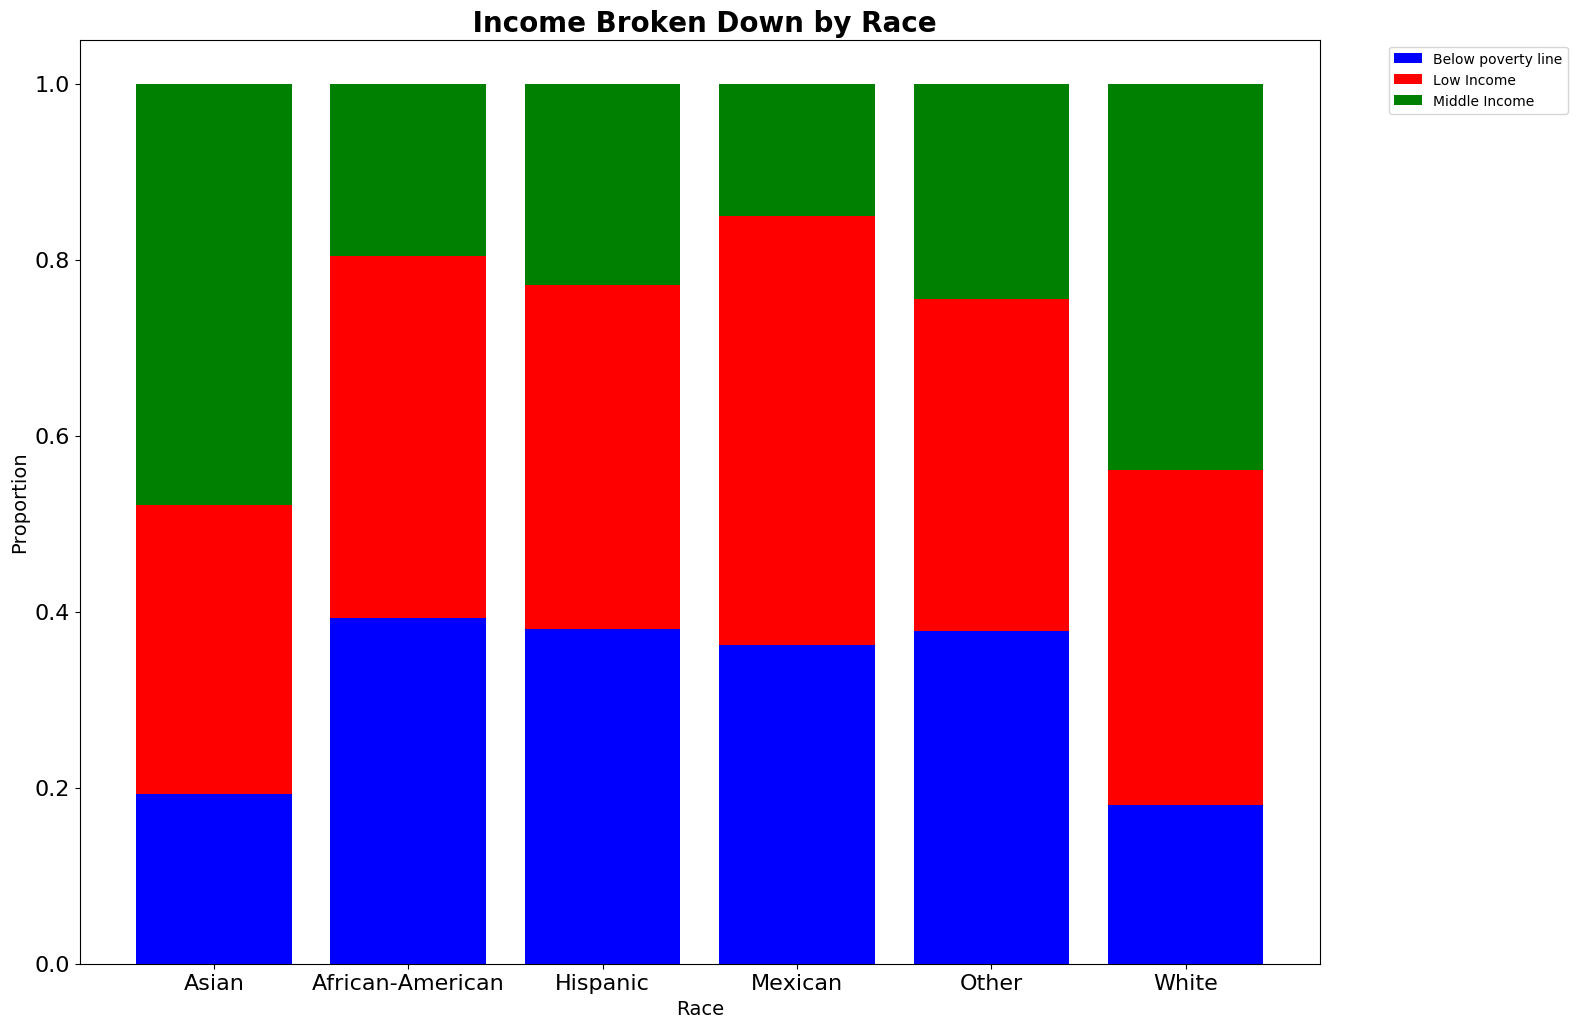

In [32]:
label = ['Asian','African-American','Hispanic', 'Mexican', 'Other', 'White',]
y_value1 = dc_2.loc['Low income tier']
y_value2 = dc_2.loc['Middle income tier']
y_value3 = dc_2.loc['Upper income tier']



fig, axs = plt.subplots(figsize=(16,12)) # Change the figure size here       
p1 = axs.bar(label, y_value1, color='blue')     
p2 = axs.bar(label, y_value2, color='red', bottom=y_value1)
p3 = axs.bar(label, y_value3, color='green', bottom=y_value1+y_value2)


axs.set_title(" Income Broken Down by Race", fontsize=20, fontweight="bold")   
axs.set_xlabel("Race", fontsize=14)
axs.set_ylabel("Proportion", fontsize=14)
axs.tick_params(labelsize=16)  
axs.legend((p1[0],p2[0],p3[0], ),('Below poverty line', 'Low Income', 'Middle Income'),
          bbox_to_anchor=(1.05, 1))
plt.show() 

In [33]:
#This code performs a chi-squared test for independence
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(table_2)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

chi2: 328.6847520320884
p: 1.3195762434738772e-64
dof: 10
expected: [[  57.31797853  119.45259392   74.6578712    95.85107335   34.43895349
   695.28152952]
 [  93.18828265  194.20751342  121.37969589  155.83586762   55.99127907
  1130.39736136]
 [  87.49373882  182.33989267  113.96243292  146.31305903   52.56976744
  1061.32110912]]


In [34]:
df['HHIncomeMid'].count()

8852

In [35]:
def CI_prop_diff(s1, s2, n1, n2):
    p1 = s1 / n1
    p2 = s2 / n2
    se2p1 = p1 * (1 - p1) / n1
    se2p2 = p2 * (1 - p2) / n2
    se2 = se2p1 + se2p2
    se = np.sqrt(se2)
    low = (p1 - p2) - 1.96 * se
    up = (p1 - p2) + 1.96 * se
    print("Proportion difference is:", p1 - p2)
    print("95% CI is: ({}, {})".format(low, up))

In [36]:
#Proportion difference between African-Americans and whites.
CI_prop_diff(s1= 195,s2=520,n1=496,n2=2887)

Proportion difference is: 0.21302739197961942
95% CI is: (0.1678127780675554, 0.25824200589168345)


In [37]:
#Proportion between African-Americans and whites.
CI_prop_diff(s1= 195,s2=118,n1=496,n2=310)

Proportion difference is: 0.012500000000000011
95% CI is: (-0.056560741746899165, 0.08156074174689919)


In [38]:
"""
A chi-square test of independence was performed to examine the relation between race and income. 
The relation between these variables was significant, X2 (10, N = 8852 ) = 352.06, p = 1.5E-69. 
Of all races, African-Americans were more likely to be on the lower tier for income, meaning that the 
null hypothesis is rejected in favor of the alternative hypothesis. The largest difference in the proportion 
of low income individuals was between African-Americans and white Americans with a value of 0.21 
(95% CI = [0.168, 0.258]). By contrast, the smallest difference in the proportion of low income individuals 
was between African-Americans and Hispanics with a value of 0.0125 (95% CI = [-0.057, 0.082]). 
"""

'\nA chi-square test of independence was performed to examine the relation between race and income. \nThe relation between these variables was significant, X2 (10, N = 8852 ) = 352.06, p = 1.5E-69. \nOf all races, African-Americans were more likely to be on the lower tier for income, meaning that the \nnull hypothesis is rejected in favor of the alternative hypothesis. The largest difference in the proportion \nof low income individuals was between African-Americans and white Americans with a value of 0.21 \n(95% CI = [0.168, 0.258]). By contrast, the smallest difference in the proportion of low income individuals \nwas between African-Americans and Hispanics with a value of 0.0125 (95% CI = [-0.057, 0.082]). \n'

In [39]:
!pip install statsmodels --user

You should consider upgrading via the 'pip install --upgrade pip' command.


In [40]:
df = df.dropna(subset=['HHIncomeMid', 'BMI'])

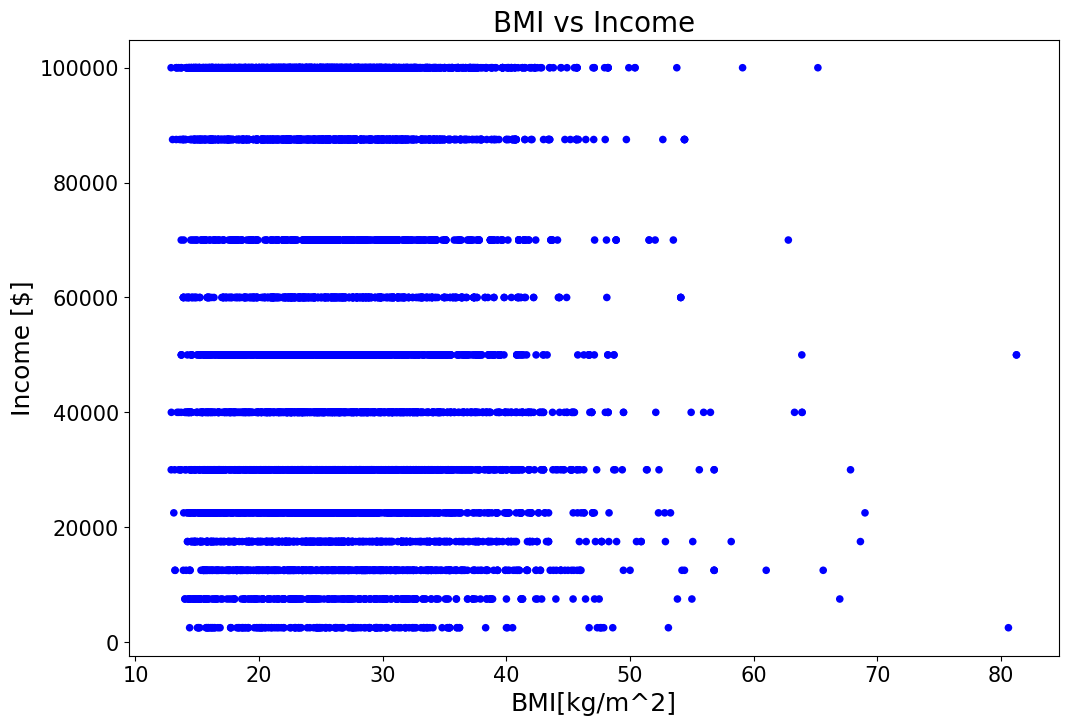

In [41]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df['BMI'], df['HHIncomeMid'], c='blue', edgecolors='none', s=30)
plt.title("BMI vs Income", fontsize=20)
axs.set_xlabel("BMI[kg/m^2]", fontsize=18)
axs.set_ylabel("Income [$]", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()


In [42]:
from scipy import stats
corr = stats.pearsonr(df['BMI'], df['HHIncomeMid'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])

Correlation coefficient: -0.06354937675983953
p-value: 2.1738634496769e-09


In [43]:
"""
Results of the Pearson correlation indicated that there was a weak significant positive association between 
transformational leadership and job satisfaction, (r(112) = .60, p = .012).

"""

'\nResults of the Pearson correlation indicated that there was a weak significant positive association between \ntransformational leadership and job satisfaction, (r(112) = .60, p = .012).\n\n'

In [44]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = df['BMI'].values
y_vals = df['HHIncomeMid']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HHIncomeMid   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     35.89
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           2.17e-09
Time:                        03:26:33   Log-Likelihood:            -1.0464e+05
No. Observations:                8852   AIC:                         2.093e+05
Df Residuals:                    8850   BIC:                         2.093e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.497e+04   1306.712     49.719      0.000    6.24e+04    6.75e+04
x1          -282.5644     47.169     -5.990      0.000    -375.026    -190.102
==============================================================================
Omnibus:                    59984.257   Durbin-Watson:                   1.335
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.376
Skew:                           0.019   Prob(JB):                    3.19e-173
Kurtosis:                       1.533   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(df['BMI']), np.max(df['BMI']), 100) 

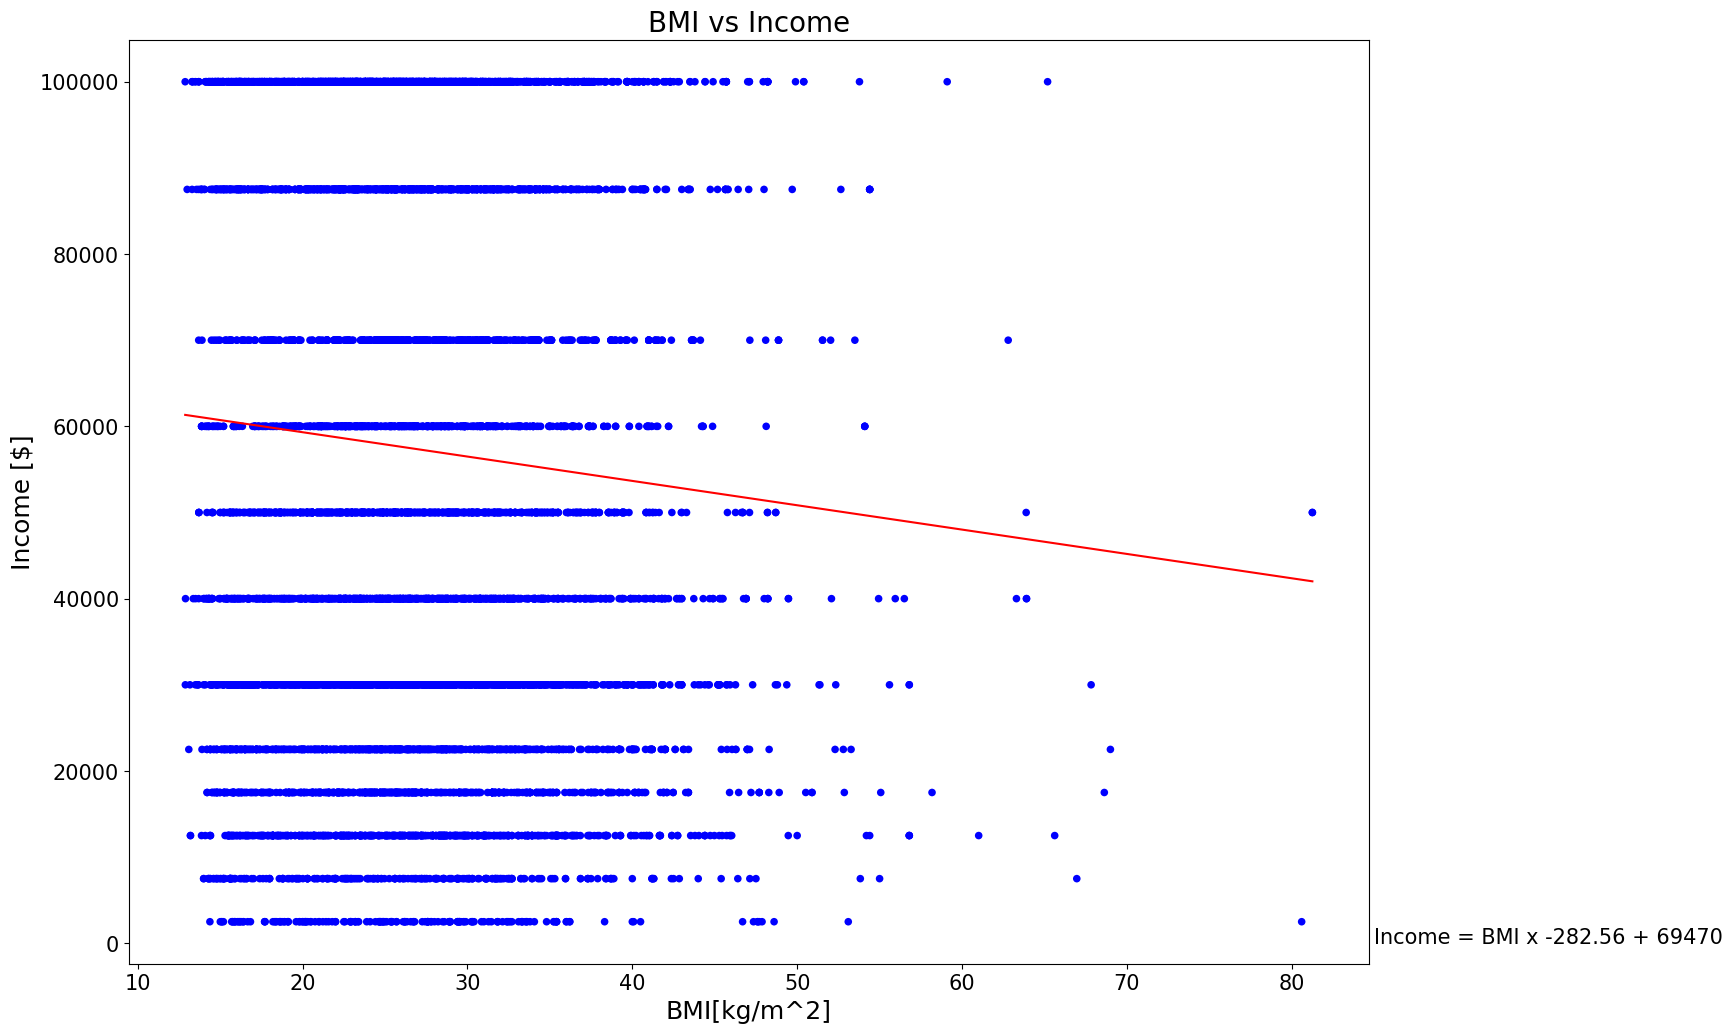

In [46]:
fig, axs = plt.subplots(figsize=(16,12))
axs.scatter(df['BMI'], df['HHIncomeMid'], c='blue', edgecolors='none', s=30)
axs.plot(x_plot, x_plot*b1 + b0, color='red')
plt.text(85,0, 'Income = BMI x -282.56 + 69470', fontsize=15)
plt.title("BMI vs Income", fontsize=20)
axs.set_xlabel("BMI[kg/m^2]", fontsize=18)
axs.set_ylabel("Income [$]", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [47]:
"""
A simple linear regression was calculated to predict income based on BMI. A significant regression was found 
(F(1,8850)= 35.89, p <.0001), with R2 of 0.004. 
Subjects’ predicted income is equal to 69470 - 282.56 [BMI] dollars when BMI is measured in kg/m2. 
Income is decreased by -282.56 (95% CI = -375.026, -190.102]) dollars for each kg/m2 of BMI. 
The model is significant but cannot account for much of the variability, as the p-value is lower than 0.05, 
but R-squared is lower than 50%. 


"""

'\nA simple linear regression was calculated to predict income based on BMI. A significant regression was found \n(F(1,8850)= 35.89, p <.0001), with R2 of 0.004. \nSubjects’ predicted income is equal to 69470 - 282.56 [BMI] dollars when BMI is measured in kg/m2. \nIncome is decreased by -282.56 (95% CI = -375.026, -190.102]) dollars for each kg/m2 of BMI. \nThe model is significant but cannot account for much of the variability, as the p-value is lower than 0.05, \nbut R-squared is lower than 50%. \n\n\n'

In [48]:
table_3 = pd.crosstab(index=df["BMI Levels"], columns=df["Income Levels"])
table_3 = table_3.reindex(['Underweight','Normal','Overweight','Obese'])
table_3

Income Levels,Low income tier,Middle income tier,Upper income tier
BMI Levels,,,
Underweight,314,447,424
Normal,572,1046,1055
Overweight,521,970,931
Obese,623,1160,789


In [49]:
probability_3 = table_3/table_3.sum()
probability_3.to_csv('Data/D5')
table_3.to_csv('Data/D6')
probability_3

Income Levels,Low income tier,Middle income tier,Upper income tier
BMI Levels,,,
Underweight,0.154680,0.123378,0.132541
Normal,0.281773,0.288711,0.329791
Overweight,0.256650,0.267734,0.291028
Obese,0.306897,0.320177,0.246640


In [50]:
dc_3 = probability_3

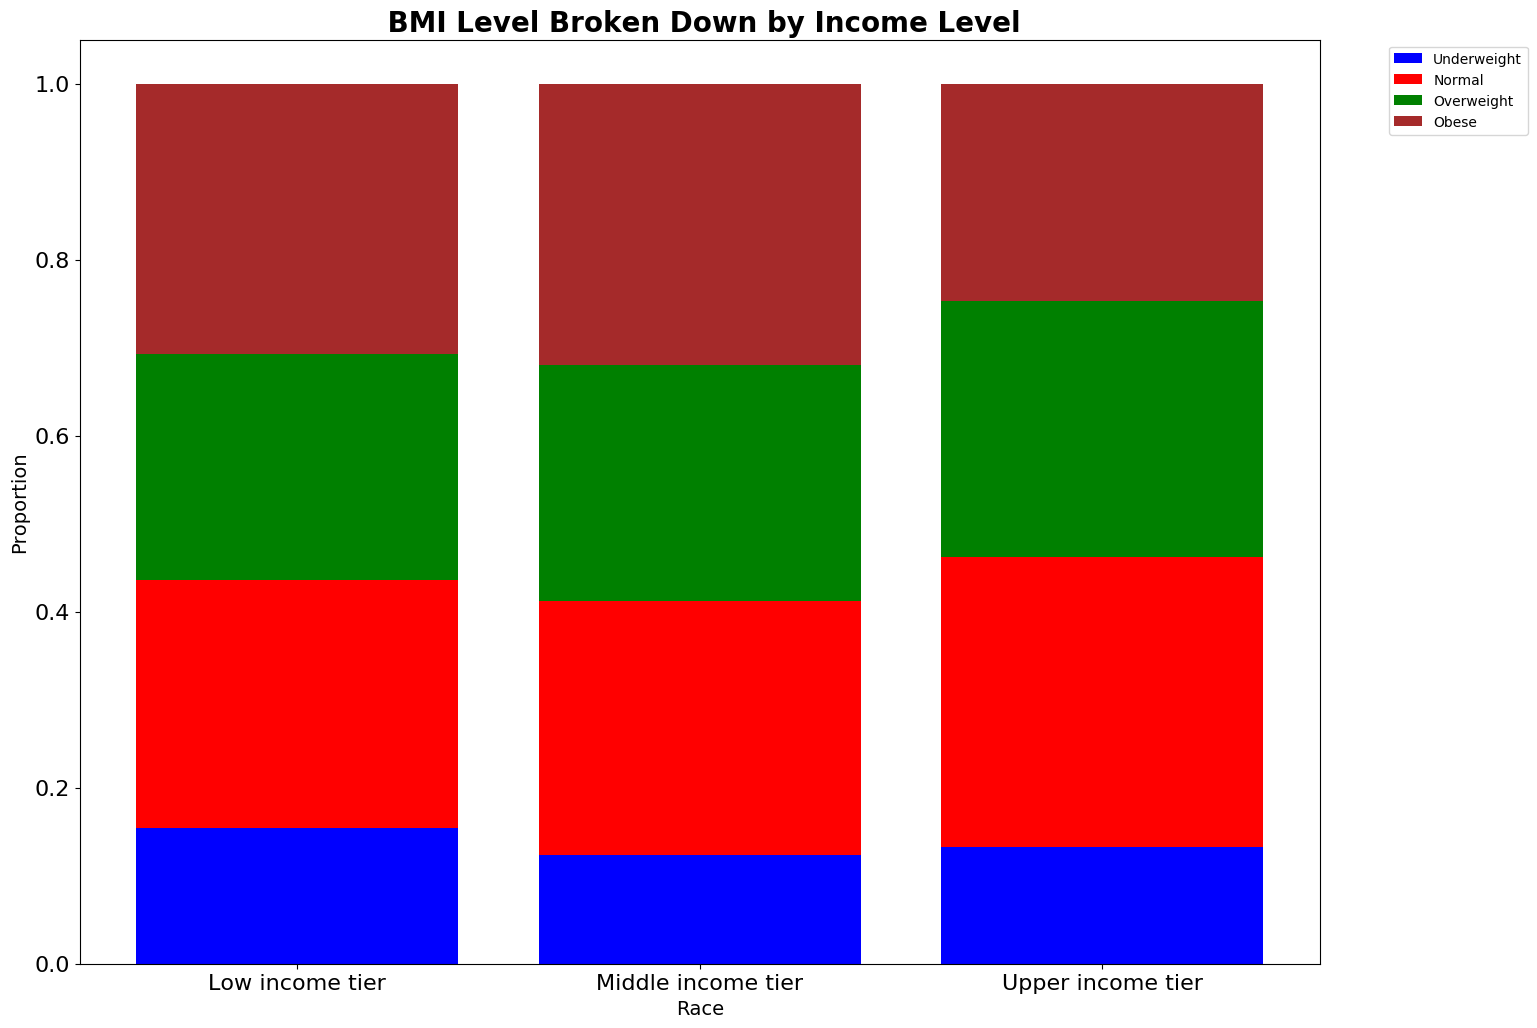

In [51]:
label = ['Low income tier', 'Middle income tier', 'Upper income tier',]

y_value1 = dc_3.loc['Underweight']
y_value2 = dc_3.loc['Normal']
y_value3 = dc_3.loc['Overweight']
y_value4 = dc_3.loc['Obese']

fig, axs = plt.subplots(figsize=(16,12)) # Change the figure size here       
p1 = axs.bar(label, y_value1, color='blue')     
p2 = axs.bar(label, y_value2, color='red', bottom=y_value1)
p3 = axs.bar(label, y_value3, color='green', bottom=y_value1+y_value2)
p4 = axs.bar(label, y_value4, color='brown', bottom=y_value1+y_value2+ y_value3)




axs.set_title(" BMI Level Broken Down by Income Level", fontsize=20, fontweight="bold")   
axs.set_xlabel("Race", fontsize=14)
axs.set_ylabel("Proportion", fontsize=14)
axs.tick_params(labelsize=16)  
axs.legend((p1[0],p2[0],p3[0],p4[0]),( 'Underweight', 'Normal', 'Overweight', 'Obese'),
          bbox_to_anchor=(1.05, 1))
plt.show() 

In [52]:
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(table_3)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

chi2: 62.81766438531788
p: 1.2023407053994815e-11
dof: 6
expected: [[ 271.75214641  485.00395391  428.24389968]
 [ 612.99028468 1094.02157704  965.98813827]
 [ 555.42928152  991.29078174  875.27993674]
 [ 589.82828739 1052.6836873   929.48802531]]


In [53]:
df_2 = pd.read_csv('Data/insurance.csv')

In [54]:
df_2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


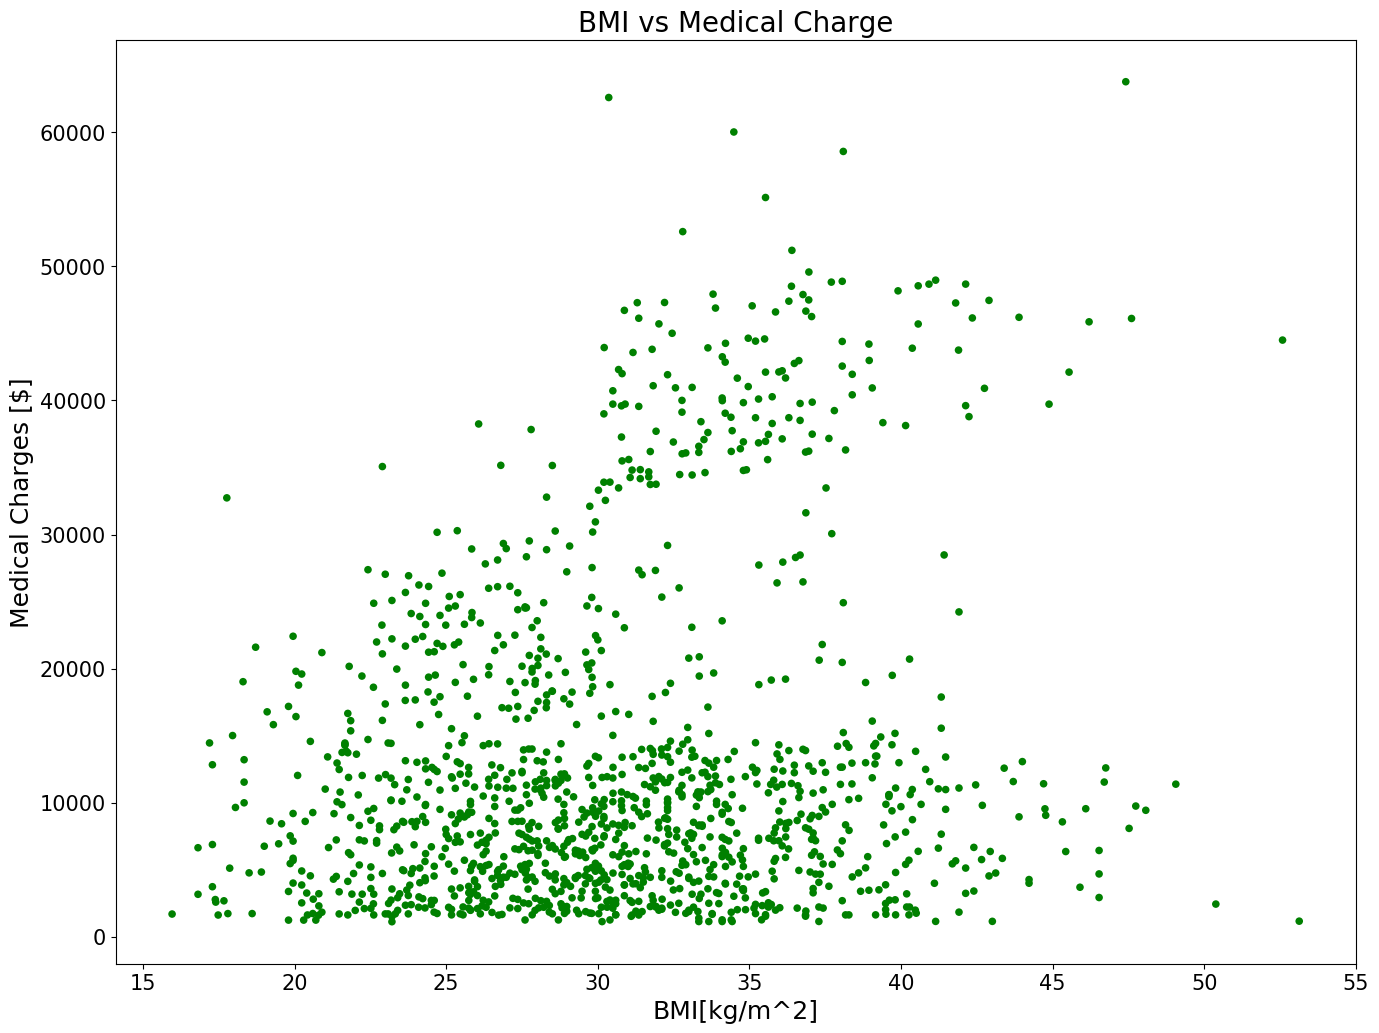

In [55]:
#this code creates a scatter plot for df_2['bmi'] and df_2['charges'].
fig, axs = plt.subplots(figsize=(16,12))
axs.scatter(df_2['bmi'], df_2['charges'], c='green', edgecolors='none', s=30)
plt.title("BMI vs Medical Charge", fontsize=20)
axs.set_xlabel("BMI[kg/m^2]", fontsize=18)
axs.set_ylabel("Medical Charges [$]", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [56]:
from scipy import stats
corr = stats.pearsonr(df_2['bmi'], df_2['charges'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])

Correlation coefficient: 0.19834096883362887
p-value: 2.459085535118864e-13


In [57]:
"""
A moderate significant relation was found between BMI and medical charges, r(1336) = .2, p = 2.5E-13. 

"""

'\nA moderate significant relation was found between BMI and medical charges, r(1336) = .2, p = 2.5E-13. \n\n'

In [58]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = df_2['bmi']
y_vals = df_2['charges']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           2.46e-13
Time:                        03:26:36   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1192.9372   1664.802      0.717      0.474   -2072.974    4458.849
bmi          393.8730     53.251      7.397      0.000     289.409     498.337
==============================================================================
Omnibus:                      261.030   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.091
Skew:                           1.297   Prob(JB):                     2.45e-94
Kurtosis:                       4.004   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(df_2['bmi']), np.max(df_2['bmi']), 100) 

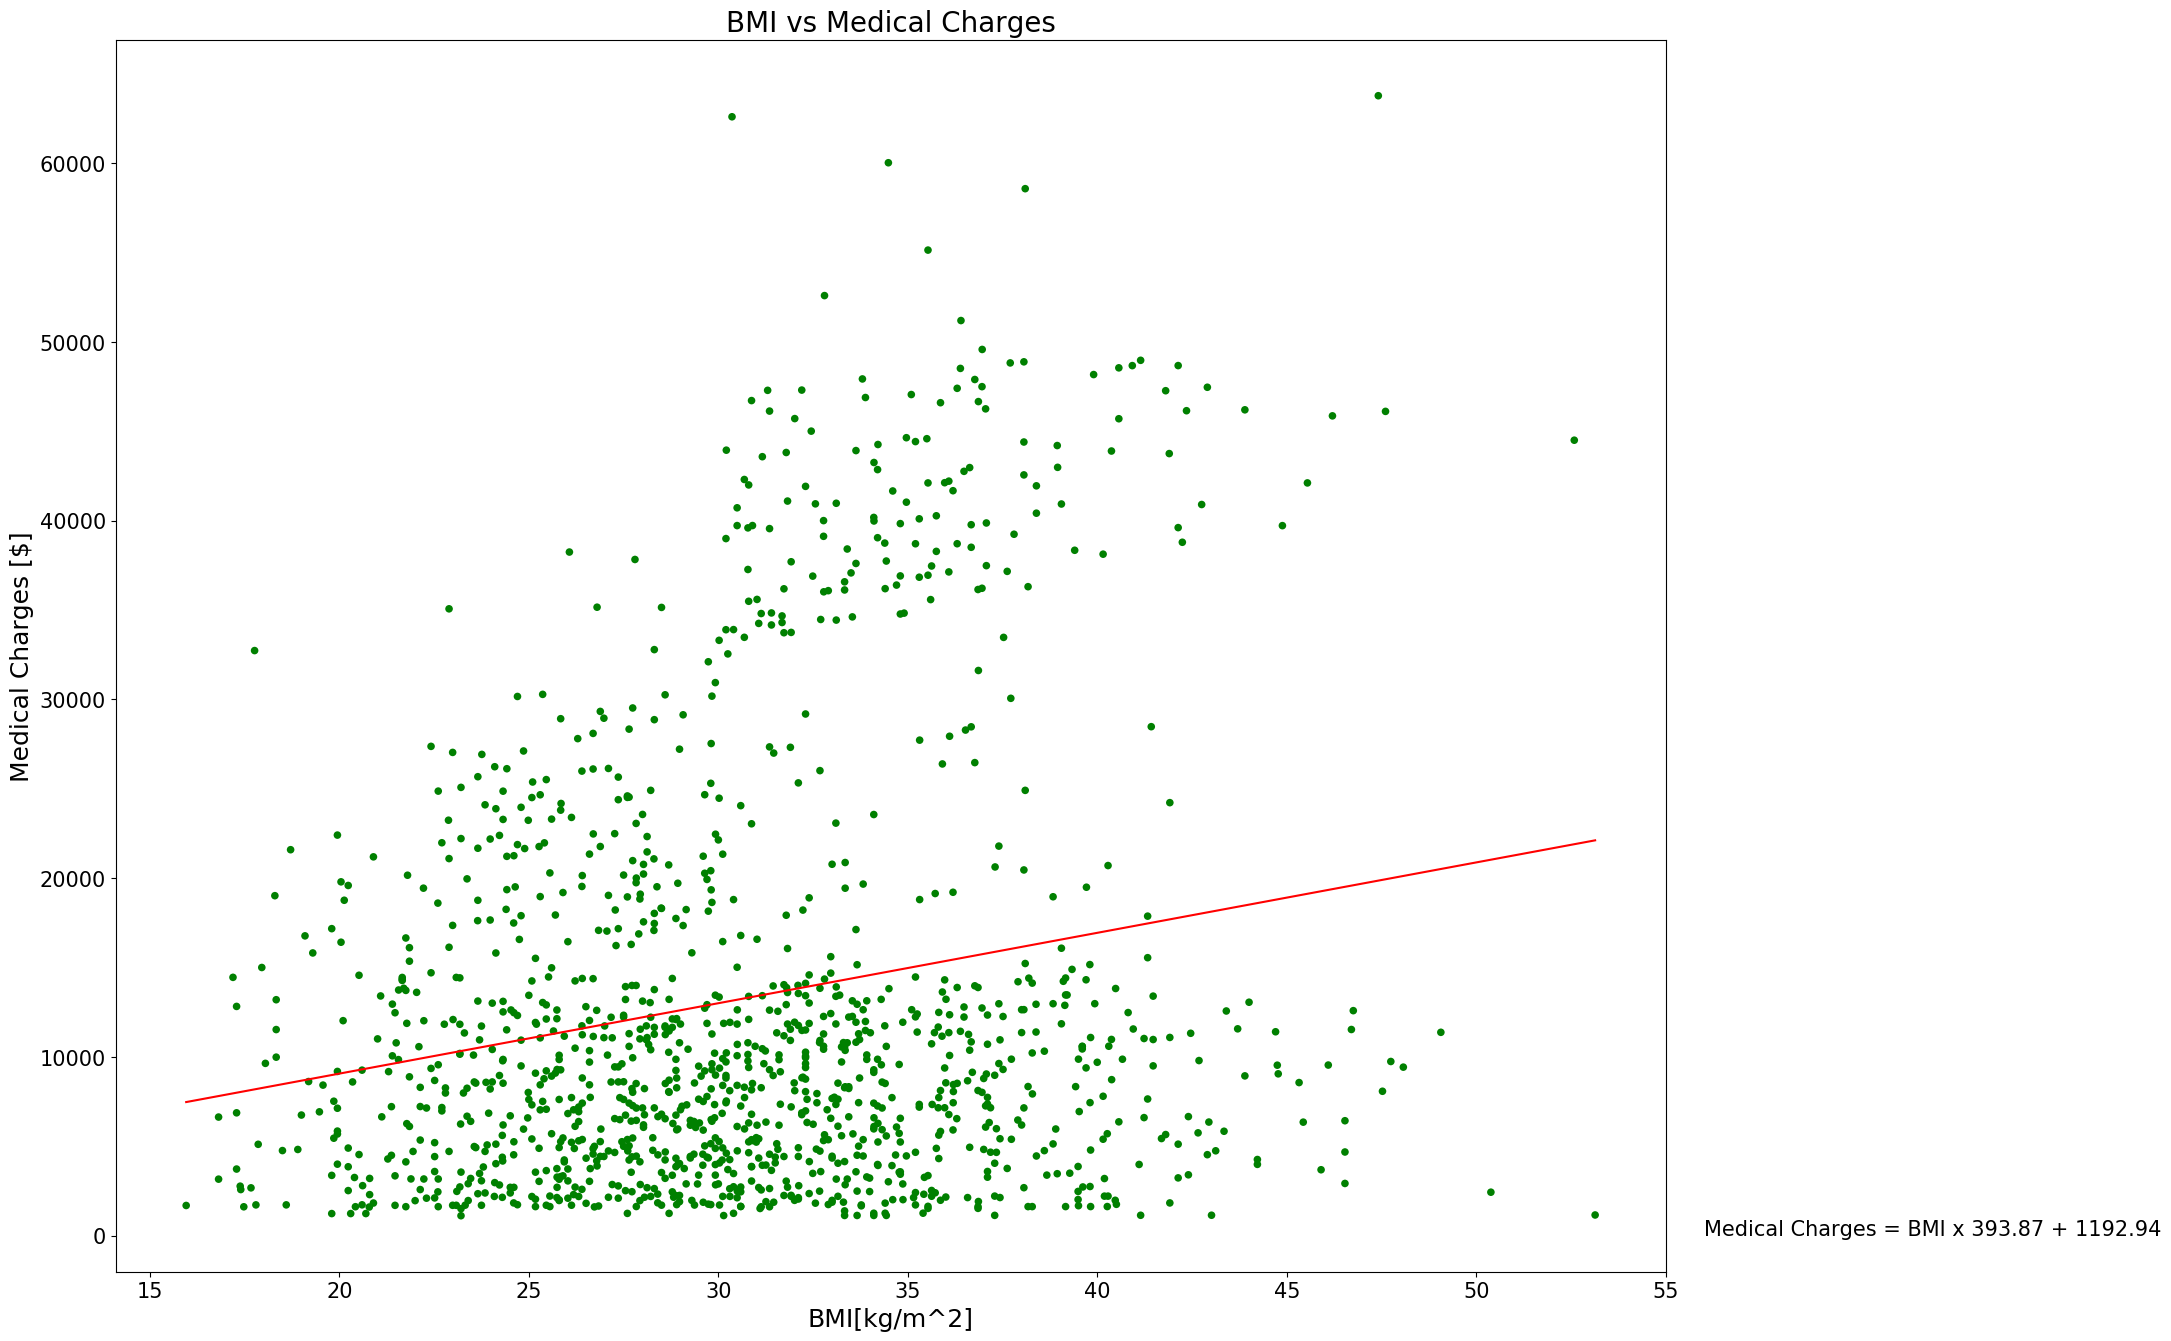

In [60]:
#this code creates a scatter plot for df_2['bmi'] and df_2['charges'].
#this one will have the regression line
fig, axs = plt.subplots(figsize=(20,16))
axs.scatter(df_2['bmi'], df_2['charges'], c='green', edgecolors='none', s=30)
axs.plot(x_plot, x_plot*b1 + b0, color='red')
plt.text(56,20, 'Medical Charges = BMI x 393.87 + 1192.94', fontsize=15)
plt.title("BMI vs Medical Charges", fontsize=20)
axs.set_xlabel("BMI[kg/m^2]", fontsize=18)
axs.set_ylabel("Medical Charges [$]", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [61]:
"""
A simple linear regression was calculated to predict income based on BMI. 
A significant regression was found (F(1,1336)= 54.71, p <.0001), with R2 of .039. 
Subjects’ predicted medical charges are equal to 393.87 [BMI] + 1192.94 dollars when BMI is measured in kg/m2. 
The medical charges are increased by 393.87 (95% CI = 289.41, 498.34]) dollars for each kg/m2 of BMI. 
The model is significant but cannot account for much of the variability as the p-value is lower than .001 
and R-squared is lower than 50%. 

"""

'\nA simple linear regression was calculated to predict income based on BMI. \nA significant regression was found (F(1,1336)= 54.71, p <.0001), with R2 of .039. \nSubjects’ predicted medical charges are equal to 393.87 [BMI] + 1192.94 dollars when BMI is measured in kg/m2. \nThe medical charges are increased by 393.87 (95% CI = 289.41, 498.34]) dollars for each kg/m2 of BMI. \nThe model is significant but cannot account for much of the variability as the p-value is lower than .001 \nand R-squared is lower than 50%. \n\n'

In [62]:
child_df = df[df['Age']<20]
adult_df = df[df['Age']>=20]



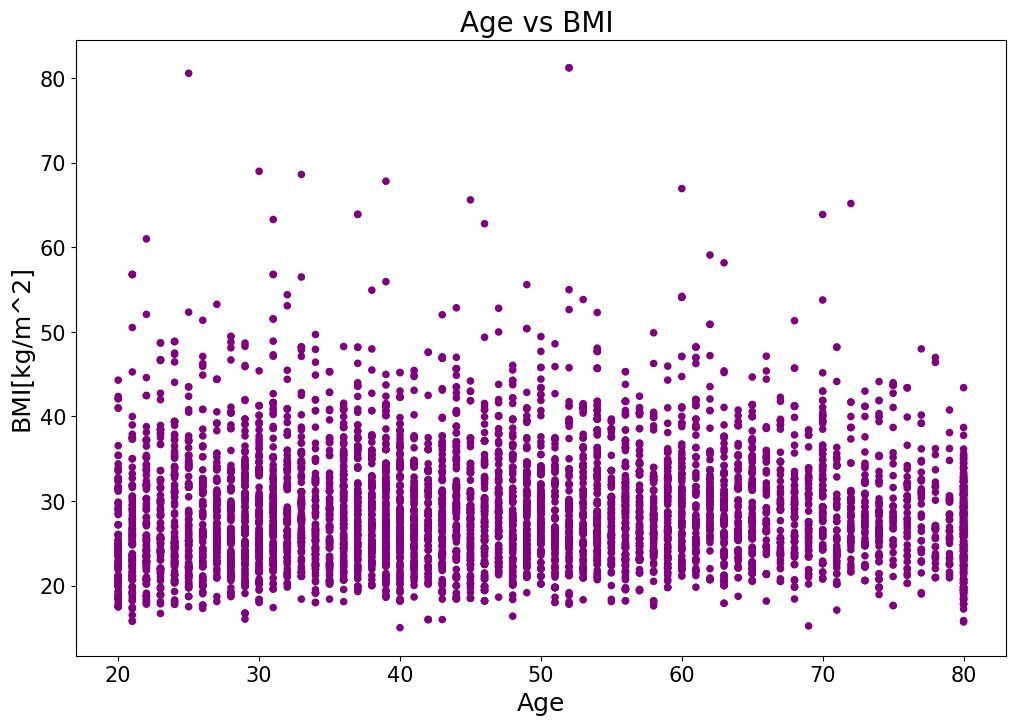

In [63]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(adult_df['Age'], adult_df['BMI'], c='purple', edgecolors='none', s=30)
plt.title("Age vs BMI ", fontsize=20)
axs.set_xlabel("Age", fontsize=18)
axs.set_ylabel("BMI[kg/m^2]", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [64]:
from scipy import stats
corr = stats.pearsonr(adult_df['Age'], adult_df['BMI'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])

Correlation coefficient: 0.03706276065602997
p-value: 0.002647309775944021


In [65]:
"""
A weak significant relation was found between Age and BMI, r(6574) = .04, p = .003. 

"""

'\nA weak significant relation was found between Age and BMI, r(6574) = .04, p = .003. \n\n'

In [66]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = adult_df['Age']
y_vals = adult_df['BMI']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     9.043
Date:                Thu, 24 Dec 2020   Prob (F-statistic):            0.00265
Time:                        03:26:38   Log-Likelihood:                -21800.
No. Observations:                6576   AIC:                         4.360e+04
Df Residuals:                    6574   BIC:                         4.362e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1584      0.244    115.390      0.000      27.680      28.637
Age            0.0147      0.005      3.007      0.003       0.005       0.024
==============================================================================
Omnibus:                     1741.353   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6019.808
Skew:                           1.311   Prob(JB):                         0.00
Kurtosis:                       6.885   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(adult_df['BMI']), np.max(adult_df['BMI']), 100) 

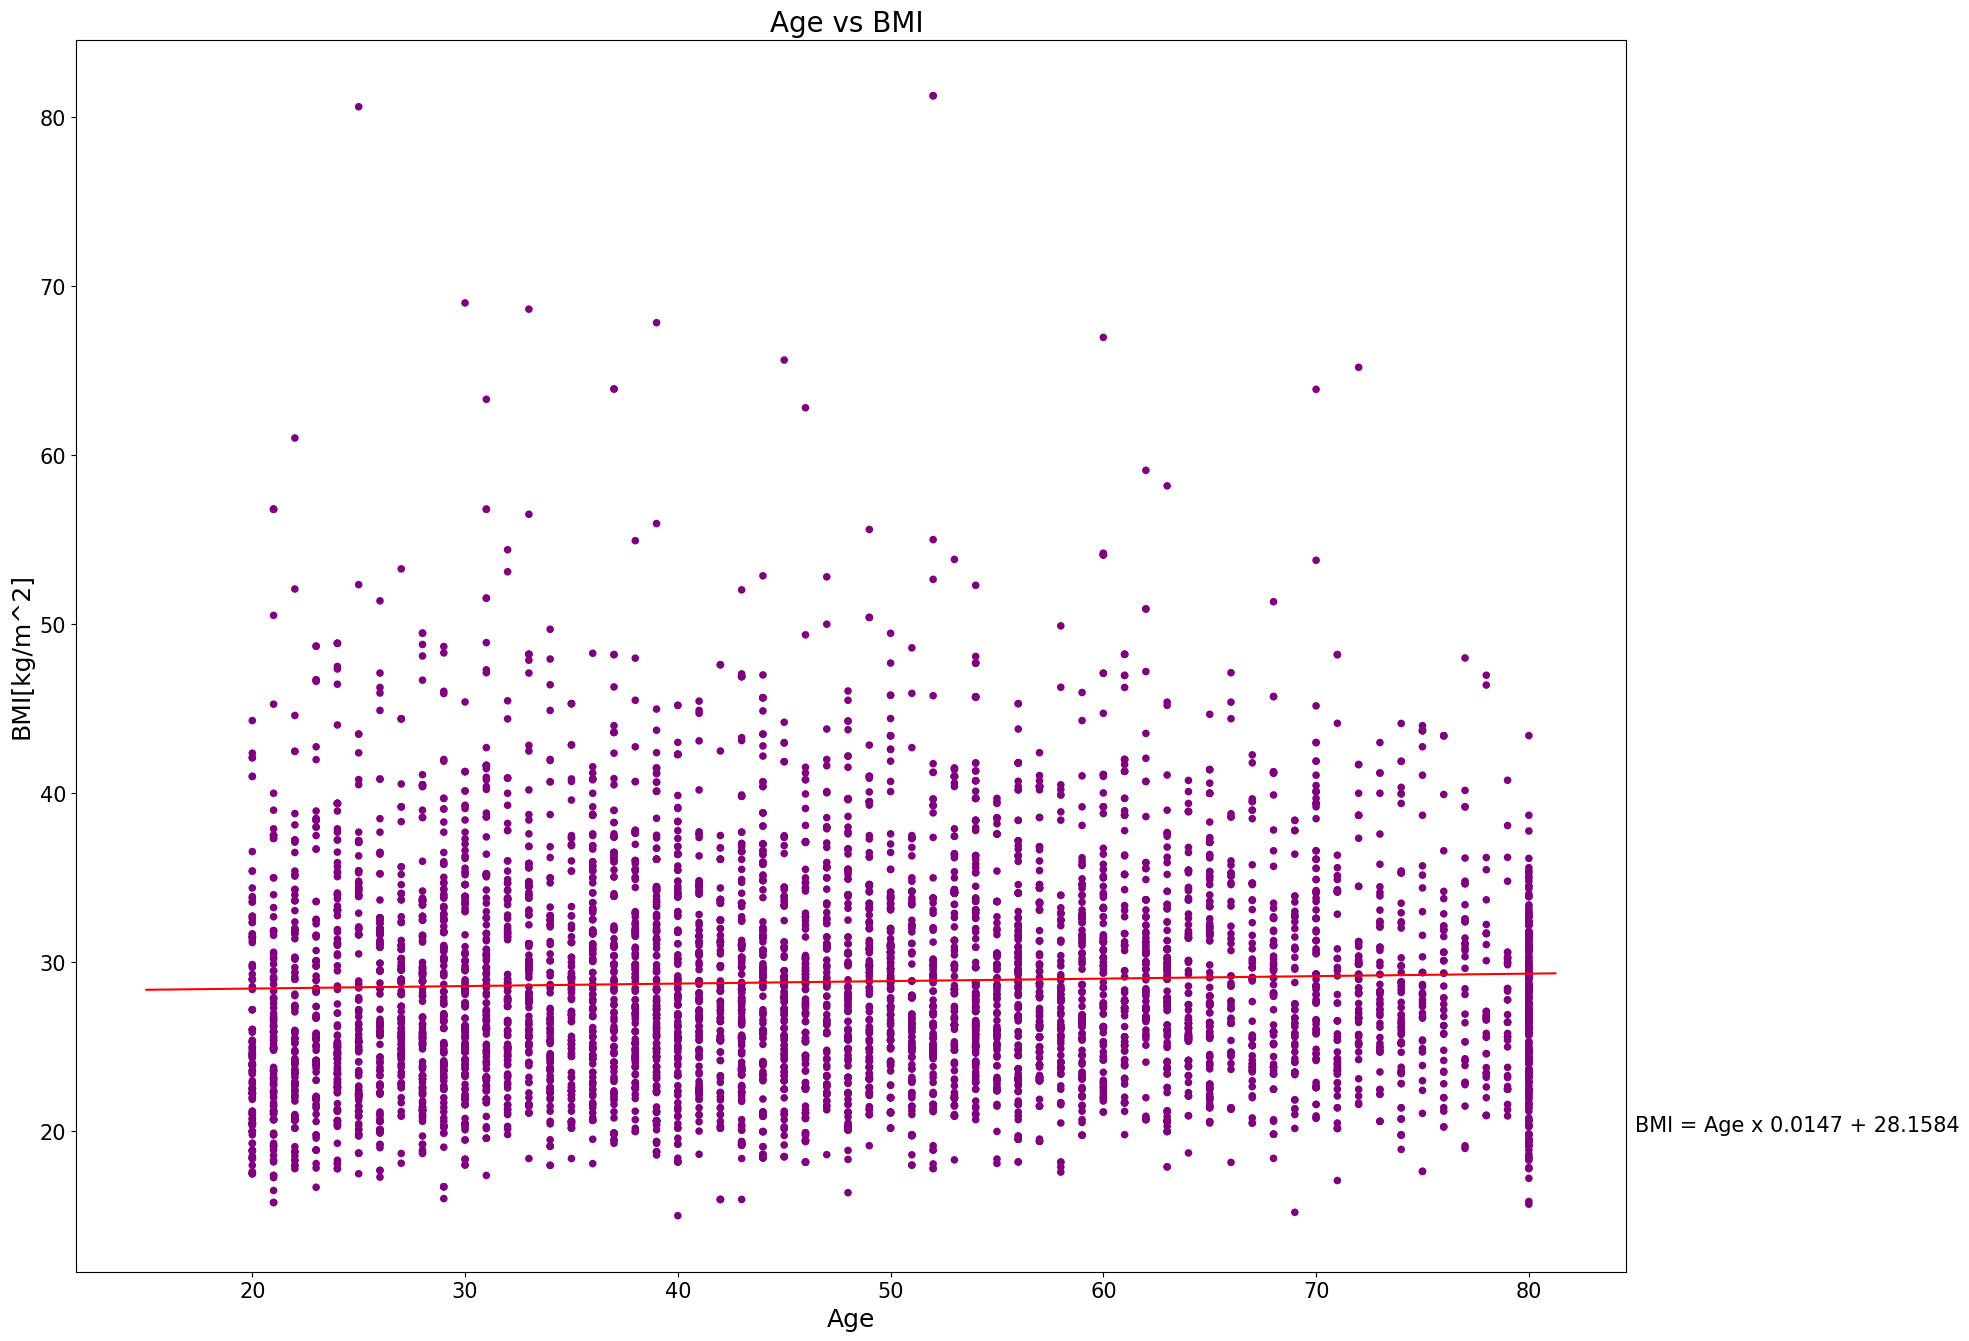

In [68]:

fig, axs = plt.subplots(figsize=(20,16))
axs.scatter(adult_df['Age'], adult_df['BMI'], c='purple', edgecolors='none', s=30)
axs.plot(x_plot, x_plot*b1 + b0, color='red')
plt.text(85,20, 'BMI = Age x 0.0147 + 28.1584', fontsize=15)
plt.title("Age vs BMI ", fontsize=20)
axs.set_xlabel("Age", fontsize=18)
axs.set_ylabel("BMI[kg/m^2]", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [69]:
"""
A simple linear regression was calculated to predict income based on BMI. 
A significant regression was found (F(1,6574)= 9.043, p <.001), with R2 of .001 
Subjects’ predicted BMI is equal to  0.0147[Age] + 28.1584 kg/m^2 when Age is measured in years. 
The BMI increased by 0.0147 (95% CI = [289.41, 498.34]) dollars for each kg/m2 of BMI. 
The model is significant but cannot account for much of the variability as the p-value is lower than .001 
and R-squared is lower than 50%. 


"""

'\nA simple linear regression was calculated to predict income based on BMI. \nA significant regression was found (F(1,6574)= 9.043, p <.001), with R2 of .001 \nSubjects’ predicted BMI is equal to  0.0147[Age] + 28.1584 kg/m^2 when Age is measured in years. \nThe BMI increased by 0.0147 (95% CI = [289.41, 498.34]) dollars for each kg/m2 of BMI. \nThe model is significant but cannot account for much of the variability as the p-value is lower than .001 \nand R-squared is lower than 50%. \n\n\n'

In [70]:
#T-test

In [71]:
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [72]:
black_df = df[df['Race3']=='Black']
white_df = df[df['Race3']=='White']
asian_df = df[df['Race3']=='Asian']
hispanic_df = df[df['Race3']=='Hispanic']


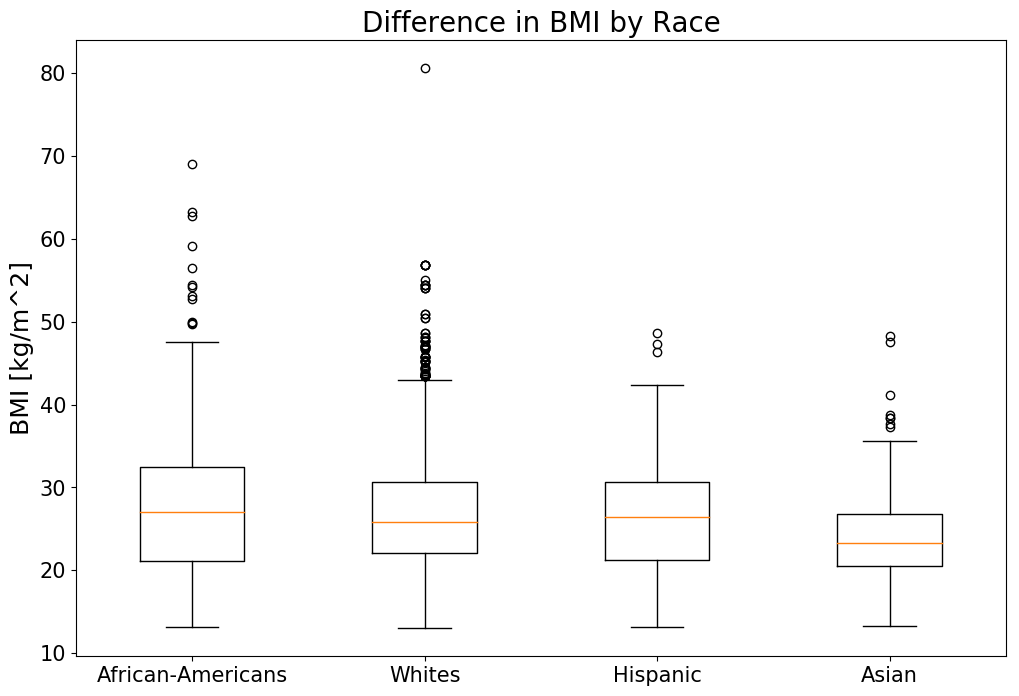

In [73]:
#Boxplot BMI ('African-Americans', 'Whites', 'Hispanic', 'Asian')
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([black_df['BMI'], white_df['BMI'], hispanic_df['BMI'], asian_df['BMI']])
plt.title('Difference in BMI by Race', fontsize=20)
axs.set_xticklabels(['African-Americans', 'Whites', 'Hispanic', 'Asian'])
axs.set_ylabel('BMI [kg/m^2]', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [74]:
#mean BMI and SD of the BMIs for African-Americans
bBMIm = np.mean(black_df['BMI'])
sdbBMI = np.std(black_df['BMI'])
print(f'M = {bBMIm}, SD = {sdbBMI}')

M = 27.749193548387098, SD = 8.87009970093203


In [75]:
#mean BMI and SD of the BMIs for Whites
wBMIm = np.mean(white_df['BMI'])
sdwBMI = np.std(white_df['BMI'])
print(f'M = {wBMIm}, SD = {sdwBMI}')

M = 26.62919986144787, SD = 7.073229911620249


In [76]:
#mean BMI and SD of the BMIs for Hispanics
hBMIm = np.mean(hispanic_df['BMI'])
sdhBMI = np.std(hispanic_df['BMI'])
print(f'M = {hBMIm}, {sdhBMI}')

M = 26.098387096774193, 6.778131152070769


In [77]:
#mean BMI and SD of the BMIs for Asians
aBMIm = np.mean(asian_df['BMI'])
sdaBMI = np.std(asian_df['BMI'])
print(f'M = {aBMIm}, SD = {sdaBMI}')

M = 23.67436974789916, SD = 5.752709867642352


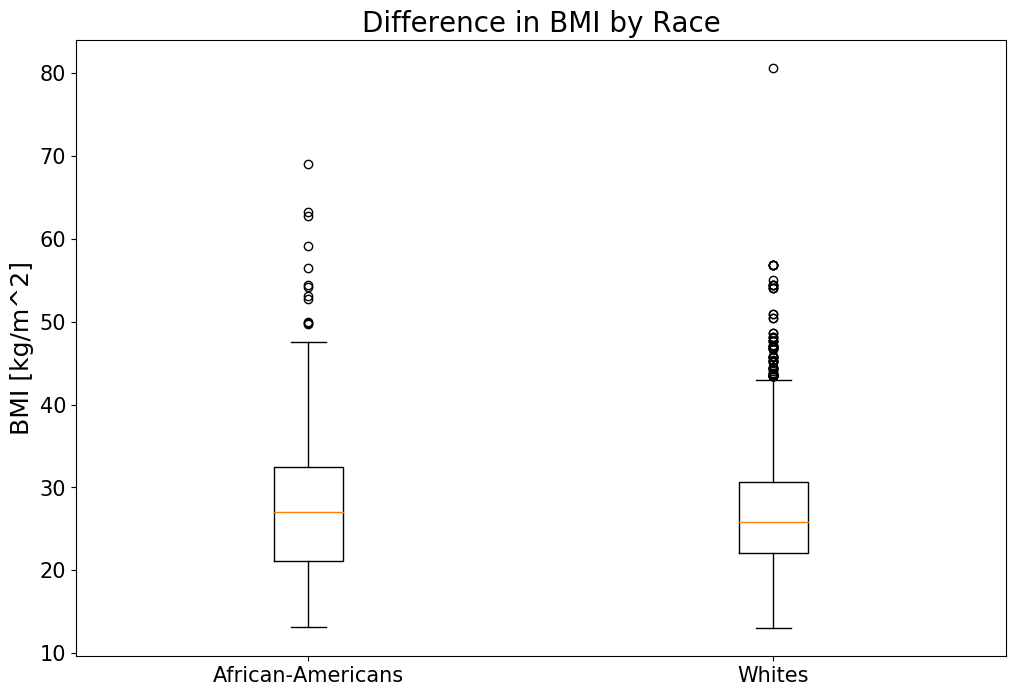

In [78]:
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([black_df['BMI'], white_df['BMI']])
plt.title('Difference in BMI by Race', fontsize=20)
axs.set_xticklabels(['African-Americans', 'Whites'])
axs.set_ylabel('BMI [kg/m^2]', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [79]:
#T-test BMI of African-Americans vs whites. 
t_val, p_val = stats.ttest_ind(black_df['BMI'], white_df['BMI'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 2.667540818502663
p-value: 0.007844577051090153


In [80]:
CI_mean_diff(black_df['BMI'], white_df['BMI'])

The average difference is: 1.1199936869392282
The 95% CI is: (0.2978304395095819, 1.9421569343688745)


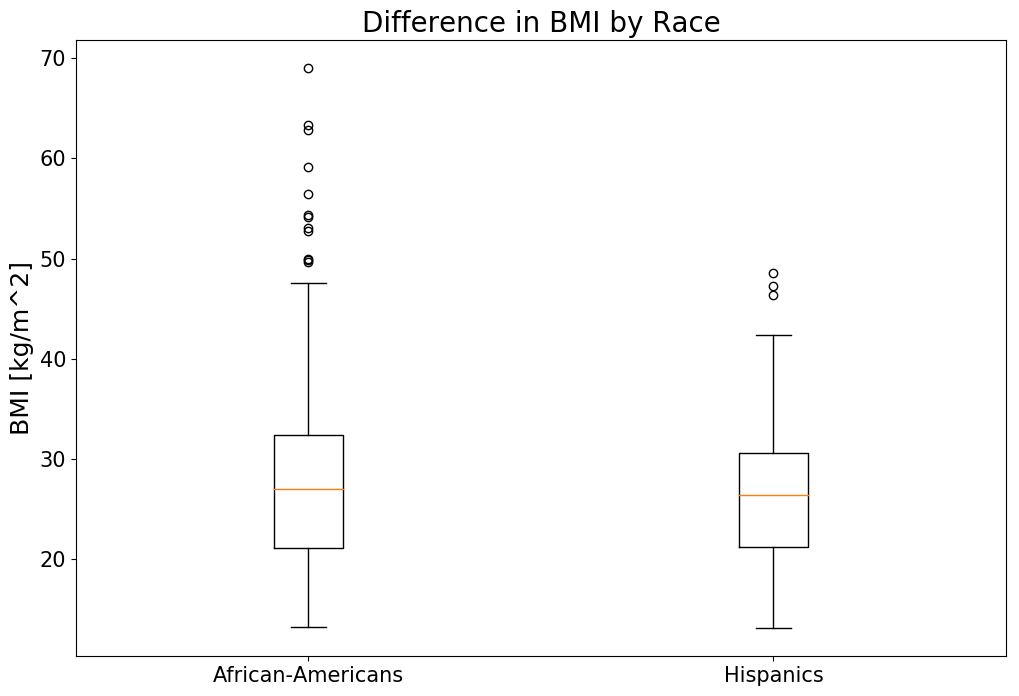

In [81]:
#Boxplot African-Americans vs Hispanics BMI
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([black_df['BMI'], hispanic_df['BMI']])
plt.title('Difference in BMI by Race', fontsize=20)
axs.set_xticklabels(['African-Americans', 'Hispanics'])
axs.set_ylabel('BMI [kg/m^2]', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [82]:
#t-test BMI of African Americans vs Hispanics 
t_val, p_val = stats.ttest_ind(black_df['BMI'], hispanic_df['BMI'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)


Test statistic: 2.9763357303365976
p-value: 0.0030082809727535837


In [83]:
CI_mean_diff(black_df['BMI'], hispanic_df['BMI'])

The average difference is: 1.6508064516129046
The 95% CI is: (0.5651189925600375, 2.7364939106657715)


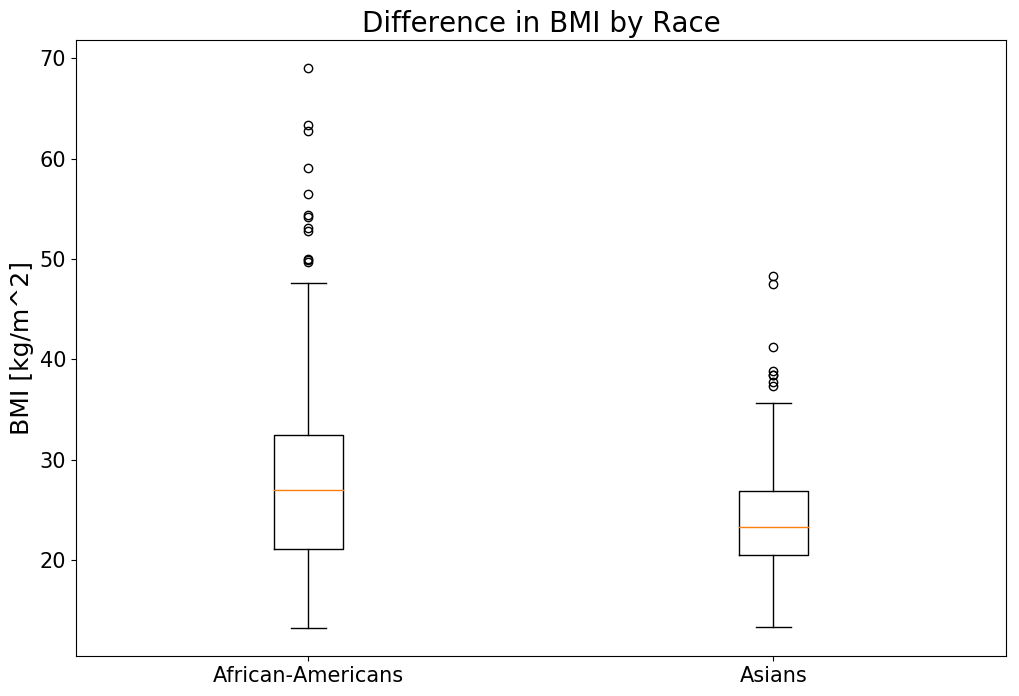

In [85]:
#Boxplot African-Americans' vs Asians' BMI
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([black_df['BMI'], asian_df['BMI']])
plt.title('Difference in BMI by Race', fontsize=20)
axs.set_xticklabels(['African-Americans', 'Asians'])
axs.set_ylabel('BMI [kg/m^2]', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [86]:
#t-test BMI of African Americans vs Asians
t_val, p_val = stats.ttest_ind(black_df['BMI'], asian_df['BMI'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)



Test statistic: 7.4572143173730625
p-value: 2.750268450844348e-13


In [87]:
CI_mean_diff(black_df['BMI'], asian_df['BMI'])

The average difference is: 4.074823800487938
The 95% CI is: (3.0054549398932027, 5.1441926610826725)


In [88]:
black_df['BMI'].describe()

count    496.000000
mean      27.749194
std        8.879055
min       13.200000
25%       21.100000
50%       27.000000
75%       32.425000
max       69.000000
Name: BMI, dtype: float64

In [89]:
white_df['BMI'].describe()
hispanic_df['BMI'].describe()
asian_df['BMI'].describe()

count    238.000000
mean      23.674370
std        5.764834
min       13.300000
25%       20.500000
50%       23.300000
75%       26.850000
max       48.300000
Name: BMI, dtype: float64

In [90]:
hispanic_df['BMI'].describe()

count    310.000000
mean      26.098387
std        6.789090
min       13.100000
25%       21.225000
50%       26.450000
75%       30.600000
max       48.600000
Name: BMI, dtype: float64

In [91]:

asian_df['BMI'].describe()

count    238.000000
mean      23.674370
std        5.764834
min       13.300000
25%       20.500000
50%       23.300000
75%       26.850000
max       48.300000
Name: BMI, dtype: float64

In [92]:
# this combines all t-tests
"""
The BMI of African-Americas,Asians,Hispanics, and Whites was compared. African-Americans (M = 27.75, SD = 8.87) 
had a higher BMI than whites (M = 26.63, SD = 7.07), as there was a statistically significant difference of
1.2 (95% CI = [0.3, 1.94]); t(3380) = 2.98, p = .008. African-Americans (M = 27.75, SD = 8.87) also  
had a higher BMI than Hispanics (M = 26.1, SD = 6.79), as there was a statistically significant difference of
1.65 (95% CI = [0.55, 12.74]); t(804) = 2.98, p = .003. Lastly, African-Americans (M = 27.75, SD = 8.87) 
had a higher BMI than Asians (M = 23.67, SD = 5.76), as there was a statistically significant difference of
 4.07 (95% CI = [3.01, 5.14]); t(732) = 7.46 , p = 2.8E-13. 
"""

'\nThe BMI of African-Americas,Asians,Hispanics, and Whites was compared. African-Americans (M = 27.75, SD = 8.87) \nhad a higher BMI than whites (M = 26.63, SD = 7.07), as there was a statistically significant difference of\n1.2 (95% CI = [0.3, 1.94]); t(3380) = 2.98, p = .008. African-Americans (M = 27.75, SD = 8.87) also  \nhad a higher BMI than Hispanics (M = 26.1, SD = 6.79), as there was a statistically significant difference of\n1.65 (95% CI = [0.55, 12.74]); t(804) = 2.98, p = .003. Lastly, African-Americans (M = 27.75, SD = 8.87) \nhad a higher BMI than Asians (M = 23.67, SD = 5.76), as there was a statistically significant difference of\n 4.07 (95% CI = [3.01, 5.14]); t(732) = 7.46 , p = 2.8E-13. \n'

In [93]:
#t-test income 

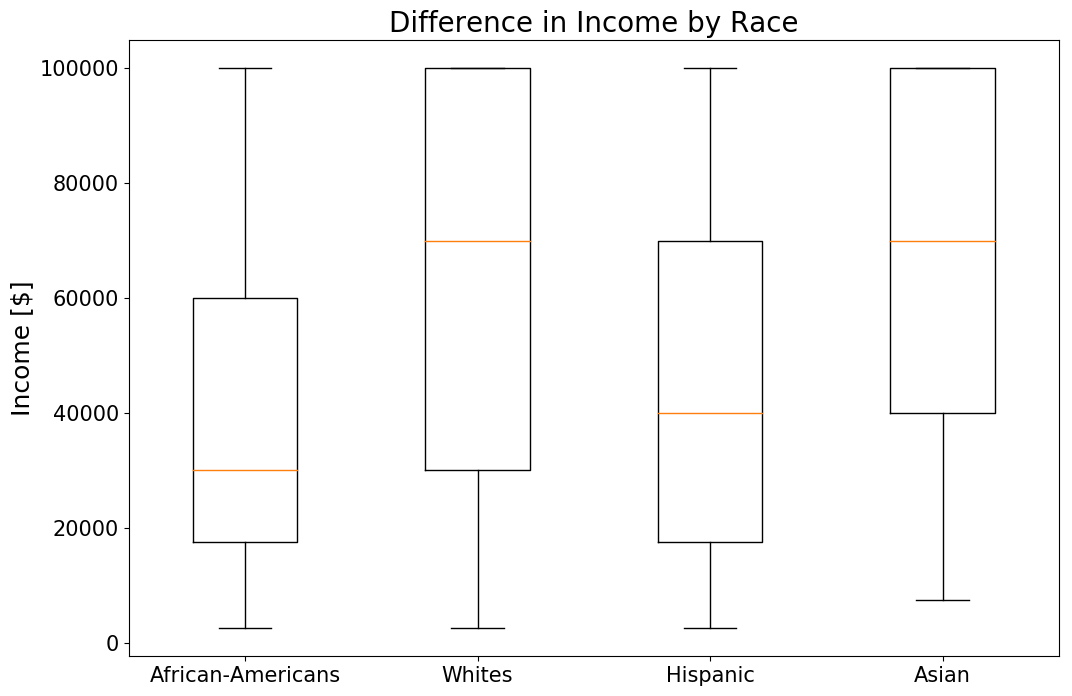

In [94]:
#Boxplot BMI ('African-Americans', 'Whites', 'Hispanic', 'Asian')
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([black_df['HHIncomeMid'], white_df['HHIncomeMid'], hispanic_df['HHIncomeMid'], asian_df['HHIncomeMid']])
plt.title('Difference in Income by Race', fontsize=20)
axs.set_xticklabels(['African-Americans', 'Whites', 'Hispanic', 'Asian'])
axs.set_ylabel('Income [$]', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [95]:
black_df['HHIncomeMid'].describe()

count       496.000000
mean      41920.362903
std       31175.281724
min        2500.000000
25%       17500.000000
50%       30000.000000
75%       60000.000000
max      100000.000000
Name: HHIncomeMid, dtype: float64

In [96]:
white_df['HHIncomeMid'].describe()

count      2887.000000
mean      63332.178732
std       33027.763162
min        2500.000000
25%       30000.000000
50%       70000.000000
75%      100000.000000
max      100000.000000
Name: HHIncomeMid, dtype: float64

In [97]:
hispanic_df['HHIncomeMid'].describe()

count       310.000000
mean      44629.032258
std       30504.513895
min        2500.000000
25%       17500.000000
50%       40000.000000
75%       70000.000000
max      100000.000000
Name: HHIncomeMid, dtype: float64

In [98]:
asian_df['HHIncomeMid'].describe()

count       238.000000
mean      65094.537815
std       32913.492475
min        7500.000000
25%       40000.000000
50%       70000.000000
75%      100000.000000
max      100000.000000
Name: HHIncomeMid, dtype: float64

In [99]:
#T-test Income of African-Americans vs whites. 
t_val, p_val = stats.ttest_ind(white_df['HHIncomeMid'], black_df['HHIncomeMid'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 14.005378444528585
p-value: 1.8150173952089526e-39


In [100]:
CI_mean_diff(white_df['HHIncomeMid'], black_df['HHIncomeMid'])

The average difference is: 21411.815829022205
The 95% CI is: (18417.930187218328, 24405.701470826083)


In [101]:
#T-test Income of African-Americans vs Hispanics. 
t_val, p_val = stats.ttest_ind(hispanic_df['HHIncomeMid'], black_df['HHIncomeMid'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 1.216085403678268
p-value: 0.22438275279351633


In [102]:
CI_mean_diff(hispanic_df['HHIncomeMid'], black_df['HHIncomeMid'])

The average difference is: 2708.669354838712
The 95% CI is: (-1650.9687649844236, 7068.307474661848)


In [103]:
#T-test Income of African-Americans vs Asians. 
t_val, p_val = stats.ttest_ind(asian_df['HHIncomeMid'], black_df['HHIncomeMid'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 9.08187704715152
p-value: 3.49266009688753e-18


In [104]:
CI_mean_diff(asian_df['HHIncomeMid'], black_df['HHIncomeMid'])

The average difference is: 23174.17491190025
The 95% CI is: (18181.723965874502, 28166.625857925996)


In [105]:
"""
The Income of African-Americas, Asians,Hispanics, and Whites was compared. African-Americans 
(M = 41920.36, SD = 31175.28)  had lower incomes than whites (M = 63332.18, SD = 33027.76), 
as there was a statistically significant difference of $21411.82 (95% CI = [18417.93, 24405.70]);
t(3380) = 14.01, p = .1.8E-39. Likewise, African-Americans (M = 41920.36, SD = 31175.28) had a lower income 
than Asians (M = 65094.54, SD = 32913.49), as there was a statistically significant difference of 23174.17
(95% CI = [18181.72, 28166.63]); t(732) =  9.08, p = .3.5E-18. Lastly, African-Americans 
(M = 41920.36, SD = 31175.28) did not have a significant income difference when compared with Hispanics 
(M = 44629.03 , SD = 30504.51). Although the difference was of  2708.67(95% CI = [-1650.97, 7068.31]), 
the p-value was over the significance level of 0.05; t(804) = 1.22, p =0.22.  

"""

'\nThe Income of African-Americas, Asians,Hispanics, and Whites was compared. African-Americans \n(M = 41920.36, SD = 31175.28)  had lower incomes than whites (M = 63332.18, SD = 33027.76), \nas there was a statistically significant difference of $21411.82 (95% CI = [18417.93, 24405.70]);\nt(3380) = 14.01, p = .1.8E-39. Likewise, African-Americans (M = 41920.36, SD = 31175.28) had a lower income \nthan Asians (M = 65094.54, SD = 32913.49), as there was a statistically significant difference of 23174.17\n(95% CI = [18181.72, 28166.63]); t(732) =  9.08, p = .3.5E-18. Lastly, African-Americans \n(M = 41920.36, SD = 31175.28) did not have a significant income difference when compared with Hispanics \n(M = 44629.03 , SD = 30504.51). Although the difference was of  2708.67(95% CI = [-1650.97, 7068.31]), \nthe p-value was over the significance level of 0.05; t(804) = 1.22, p =0.22.  \n\n'

In [106]:
#Income and obesity 

In [107]:
under_df = df[df['BMI'] <18.5]
normal_df = df[df['BMI']<25]
over_df = df[df['BMI']<30]
obese_df = df[df['BMI']>30]

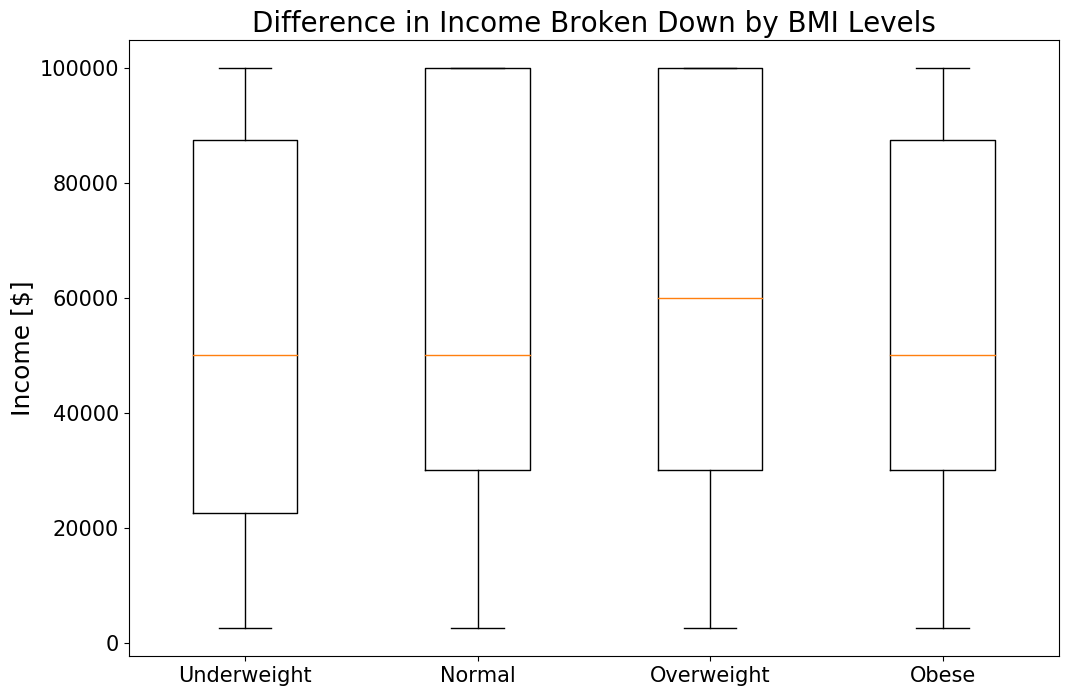

In [108]:
#Boxplot BMI ('African-Americans', 'Whites', 'Hispanic', 'Asian')
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([under_df['HHIncomeMid'], normal_df['HHIncomeMid'], over_df['HHIncomeMid'], obese_df['HHIncomeMid']])
plt.title('Difference in Income Broken Down by BMI Levels', fontsize=20)
axs.set_xticklabels(['Underweight', 'Normal', 'Overweight', 'Obese'])
axs.set_ylabel('Income [$]', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [109]:
under_df['HHIncomeMid'].describe()

count      1185.000000
mean      55468.354430
std       33849.204341
min        2500.000000
25%       22500.000000
50%       50000.000000
75%       87500.000000
max      100000.000000
Name: HHIncomeMid, dtype: float64

In [110]:
normal_df['HHIncomeMid'].describe()

count      3858.000000
mean      58394.245723
std       33472.646037
min        2500.000000
25%       30000.000000
50%       50000.000000
75%      100000.000000
max      100000.000000
Name: HHIncomeMid, dtype: float64

In [111]:
over_df['HHIncomeMid'].describe()

count      6280.000000
mean      58903.264331
std       33283.572867
min        2500.000000
25%       30000.000000
50%       60000.000000
75%      100000.000000
max      100000.000000
Name: HHIncomeMid, dtype: float64

In [112]:
obese_df['HHIncomeMid'].describe()

count      2557.000000
mean      53761.243645
std       31982.273242
min        2500.000000
25%       30000.000000
50%       50000.000000
75%       87500.000000
max      100000.000000
Name: HHIncomeMid, dtype: float64

In [113]:
#T-test Income of undrweight vs obese. 
t_val, p_val = stats.ttest_ind(under_df['HHIncomeMid'], obese_df['HHIncomeMid'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 1.4601258871092162
p-value: 0.1443987477103746


In [114]:
CI_mean_diff(under_df['HHIncomeMid'], obese_df['HHIncomeMid'])

The average difference is: 1707.1107854833826
The 95% CI is: (-583.6141823826979, 3997.835753349463)


In [115]:
#T-test Income of normal vs obese. 
t_val, p_val = stats.ttest_ind(normal_df['HHIncomeMid'], obese_df['HHIncomeMid'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 5.575701814031394
p-value: 2.579769777610361e-08


In [116]:
CI_mean_diff(normal_df['HHIncomeMid'], obese_df['HHIncomeMid'])

The average difference is: 4633.002078276266
The 95% CI is: (3004.658156791452, 6261.34599976108)


In [117]:
#T-test Income of overweight vs obese. 
t_val, p_val = stats.ttest_ind(over_df['HHIncomeMid'], obese_df['HHIncomeMid'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 6.772700729844746
p-value: 1.4122386146897244e-11


In [118]:
CI_mean_diff(over_df['HHIncomeMid'], obese_df['HHIncomeMid'])

The average difference is: 5142.02068631383
The 95% CI is: (3654.172985072971, 6629.8683875546885)


In [147]:
"""

The income of the obese tier, overweight tier, normal tier, and underweight tier were compared.  
When the income of the underweight tier (M = 55468.35, SD = 33849.2) was compared with the obese tier 
(M = 53761.24, SD = 31982.27), there was a statistically insignificant difference of $1707.11 
(95% CI = [-583.61, 3997.84]; t(3740) = 1,46, p = 0.14. By contrast, when the average income of the normal tier 
(M = 58394.25 , SD = 33472.65) was compared with the medical charges of the obese tier 
(M = 53761.24, SD = 31982.27), there was a significant difference of $4633 (95% CI = [3004.66, 6261.35 ];
t(6413) = 5.58, p = 2.6E-8. Likewise, when the average income of the overweight tier (M =58903.26, SD = 33472.64 )
was compared with medical charges of the obese tier (M = 53761.24, SD = 31982.27), there was a significant 
difference of $5142.02 (95% CI = [3654.17, 6629.87]); t(8835) = 6.77, p =1.4E-11. 


"""

'\n\nThe income of the obese tier, overweight tier, normal tier, and underweight tier were compared.  \nWhen the income of the underweight tier (M = 55468.35, SD = 33849.2) was compared with the obese tier \n(M = 53761.24, SD = 31982.27), there was a statistically insignificant difference of $1707.11 \n(95% CI = [-583.61, 3997.84]; t(3740) = 1,46, p = 0.14. By contrast, when the average income of the normal tier \n(M = 58394.25 , SD = 33472.65) was compared with the medical charges of the obese tier \n(M = 53761.24, SD = 31982.27), there was a significant difference of $4633 (95% CI = [3004.66, 6261.35 ];\nt(6413) = 5.58, p = 2.6E-8. Likewise, when the average income of the overweight tier (M =58903.26, SD = 33472.64 )\nwas compared with medical charges of the obese tier (M = 53761.24, SD = 31982.27), there was a significant \ndifference of $5142.02 (95% CI = [3654.17, 6629.87]); t(8835) = 6.77, p =1.4E-11. \n\n\n'

In [120]:
#t-test obesity levels and charges 

In [121]:
und_df = df_2[df_2['bmi'] <18.5]
norm_df = df_2[df_2['bmi']<25]
ov_df = df_2[df_2['bmi']<30]
obe_df = df_2[df_2['bmi']>30]

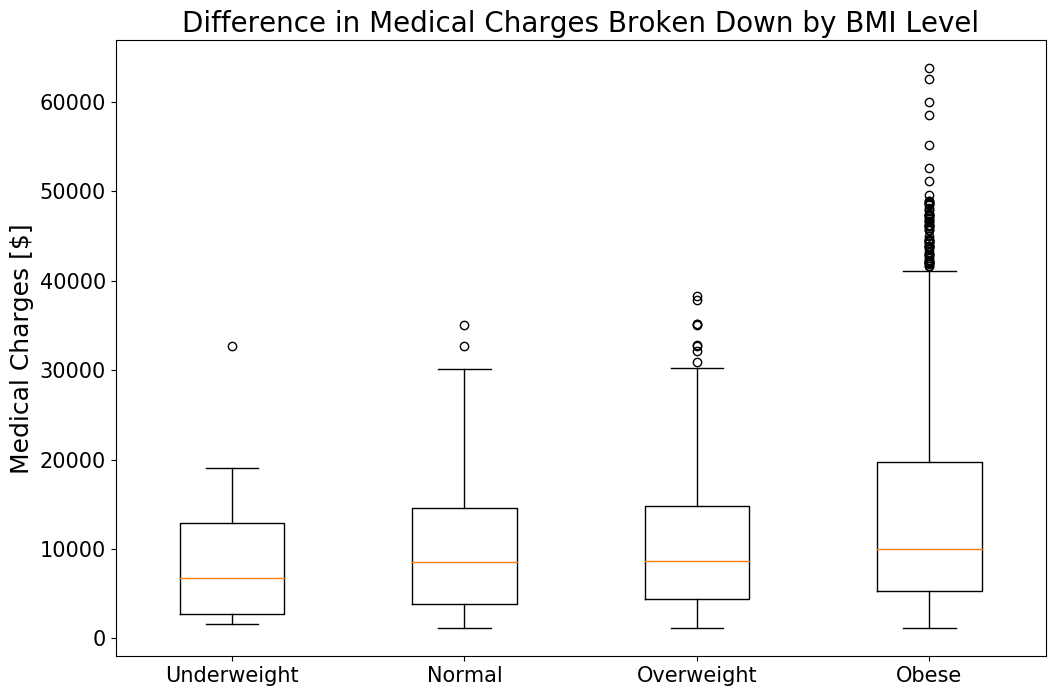

In [122]:
#Boxplot BMI ('African-Americans', 'Whites', 'Hispanic', 'Asian')
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([und_df['charges'], norm_df['charges'], ov_df['charges'], obe_df['charges']])
plt.title('Difference in Medical Charges Broken Down by BMI Level', fontsize=20)
axs.set_xticklabels(['Underweight', 'Normal', 'Overweight', 'Obese'])
axs.set_ylabel('Medical Charges [$]', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [123]:
und_df['charges'].describe()

count       20.000000
mean      8852.200585
std       7735.038364
min       1621.340200
25%       2751.631438
50%       6759.262475
75%      12923.162737
max      32734.186300
Name: charges, dtype: float64

In [124]:
norm_df['charges'].describe()

count      245.000000
mean     10282.224474
std       7520.485850
min       1121.873900
25%       3861.209650
50%       8582.302300
75%      14571.890800
max      35069.374520
Name: charges, dtype: float64

In [125]:
ov_df['charges'].describe()

count      631.000000
mean     10713.666901
std       7843.536999
min       1121.873900
25%       4436.678800
50%       8604.483650
75%      14850.087900
max      38245.593270
Name: charges, dtype: float64

In [126]:
obe_df['charges'].describe()

count      705.000000
mean     15560.926321
std      14563.057442
min       1131.506600
25%       5240.765000
50%       9964.060000
75%      19673.335730
max      63770.428010
Name: charges, dtype: float64

In [127]:
"""
The medical charges of the obese tier, overweight tier, normal tier, and underweight tier were compared. 
When the underweight tier (M = 8852.2, SD = 7735.04) was compared with the obese tier (M = 15560.92, SD = 14563.06),
there was a significant difference of $6708.73 (95% CI = [3234.29, 10183.16]; t(723) = 3.7, p = 1E-12. 
Likewise, when the medical charges of the obese tier (M = 15560.92, SD = 14563.06) were compared with 
the medical charges of the normal tier (M = 10282.44, SD = 14563.06) , there was a significant difference of 
$5278.70 (95% CI = [3851.38, 6706.01]. Lastly, when the medical charges of the obese tier (M = 8852.2, SD = 7735.04)
were compared with medical charges of the overweight tier (M =10713.67, SD =  7843.54),there was a significant 
difference of $4874.26 (95% CI = [3611.15, 6083.87]); t(1334) = 7.68, p = 3.5E-14. 
"""

'\nThe medical charges of the obese tier, overweight tier, normal tier, and underweight tier were compared. \nWhen the underweight tier (M = 8852.2, SD = 7735.04) was compared with the obese tier (M = 15560.92, SD = 14563.06),\nthere was a significant difference of $6708.73 (95% CI = [3234.29, 10183.16]; t(723) = 3.7, p = 1E-12. \nLikewise, when the medical charges of the obese tier (M = 15560.92, SD = 14563.06) were compared with \nthe medical charges of the normal tier (M = 10282.44, SD = 14563.06) , there was a significant difference of \n$5278.70 (95% CI = [3851.38, 6706.01]. Lastly, when the medical charges of the obese tier (M = 8852.2, SD = 7735.04)\nwere compared with medical charges of the overweight tier (M =10713.67, SD =  7843.54),there was a significant \ndifference of $4874.26 (95% CI = [3611.15, 6083.87]); t(1334) = 7.68, p = 3.5E-14. \n'

In [128]:
#Mean difference of medical charges between obese and overweight 
t_val, p_val = stats.ttest_ind(obe_df['charges'],ov_df['charges'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 7.680295461155982
p-value: 3.4844733376072226e-14


In [129]:
CI_mean_diff(obe_df['charges'], ov_df['charges'])

The average difference is: 4847.259420677623
The 95% CI is: (3611.1488398622696, 6083.370001492976)


In [130]:
#Mean difference of medical charges between obese and normal 
t_val, p_val = stats.ttest_ind(obe_df['charges'], norm_df['charges'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 7.239429250293585
p-value: 1.0429064525873154e-12


In [131]:
CI_mean_diff(obe_df['charges'], norm_df['charges'])

The average difference is: 5278.701846895063
The 95% CI is: (3851.389409397174, 6706.014284392952)


In [132]:
#Mean difference of medical charges between obese and underweight 
t_val, p_val = stats.ttest_ind(obe_df['charges'], und_df['charges'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 3.6973102377251403
p-value: 0.0011886806305453463


In [133]:
CI_mean_diff(obe_df['charges'], und_df['charges'])

The average difference is: 6708.72573626241
The 95% CI is: (3234.289944586104, 10183.161527938715)


In [134]:
"""
The medical charges of the obese tier, overweight tier, normal tier, and underweight tier were compared. 
Individuals in the obese (M = 41920.36, SD = 31175.28)  had lower incomes than whites (M = 63332.18, SD = 33027.76), 
as there was a statistically significant difference of $21411.82 (95% CI = [18417.93, 24405.70]);
t(3380) = 14.01, p = .1.8E-39. Likewise, African-Americans (M = 41920.36, SD = 31175.28) had a lower income 
than Asians (M = 65094.54, SD = 32913.49), as there was a statistically significant difference of 23174.17
(95% CI = [18181.72, 28166.63]); t(732) =  9.08, p = .3.5E-18. Lastly, African-Americans 
(M = 41920.36, SD = 31175.28) did not have a significant income difference when compared with Hispanics 
(M = 44629.03 , SD = 30504.51). Although the difference was of  2708.67(95% CI = [-1650.97, 7068.31]), 
the p-value was over the significance level of 0.05; t(804) = 1.22, p =0.22.  

"""

'\nThe medical charges of the obese tier, overweight tier, normal tier, and underweight tier were compared. \nIndividuals in the obese (M = 41920.36, SD = 31175.28)  had lower incomes than whites (M = 63332.18, SD = 33027.76), \nas there was a statistically significant difference of $21411.82 (95% CI = [18417.93, 24405.70]);\nt(3380) = 14.01, p = .1.8E-39. Likewise, African-Americans (M = 41920.36, SD = 31175.28) had a lower income \nthan Asians (M = 65094.54, SD = 32913.49), as there was a statistically significant difference of 23174.17\n(95% CI = [18181.72, 28166.63]); t(732) =  9.08, p = .3.5E-18. Lastly, African-Americans \n(M = 41920.36, SD = 31175.28) did not have a significant income difference when compared with Hispanics \n(M = 44629.03 , SD = 30504.51). Although the difference was of  2708.67(95% CI = [-1650.97, 7068.31]), \nthe p-value was over the significance level of 0.05; t(804) = 1.22, p =0.22.  \n\n'

In [135]:
def blood_pressure(row):
    # this was a shortcut to acquire the data of people who are 20+ years old. 
    if row['Age'] >= 20:
        if row['BPDiaAve'] < 80 and row['BPSysAve'] < 120:
            return 'Healthy'
        elif row['BPDiaAve'] < 80  and row['BPSysAve']  <= 129:
            return 'Elevated'
        elif row['BPDiaAve'] > 120  or  row['BPSysAve'] > 180:
            return 'Hypertensive crisis'
        elif row['BPDiaAve'] > 89  or row['BPSysAve'] > 139 :
            return 'Stage 2 Hypertension'
        elif row['BPDiaAve'] >= 80  or row['BPSysAve'] > 129:
            return 'Stage 1 Hypertension'


In [136]:
df = df.dropna(subset=['BPDiaAve', 'BPSysAve'])

In [137]:
df['Blood Pressure Classification'] = df.apply(blood_pressure, axis = 1)
df['Blood Pressure Classification'].value_counts()

Healthy                 3070
Stage 1 Hypertension    1298
Elevated                1055
Stage 2 Hypertension     896
Hypertensive crisis       37
Name: Blood Pressure Classification, dtype: int64

In [138]:
table_4 = pd.crosstab(index=df["Blood Pressure Classification"], columns=df["BMI Levels"])

In [139]:
table_4 
table_4 = table_4.reindex(['Healthy','Elevated','Stage 1 Hypertension','Stage 2 Hypertension','Hypertensive crisis'])
table_4




BMI Levels,Normal,Obese,Overweight,Underweight
Blood Pressure Classification,,,,
Healthy,1064,941,991,74
Elevated,264,426,358,7
Stage 1 Hypertension,285,586,417,10
Stage 2 Hypertension,209,365,318,4
Hypertensive crisis,16,14,5,2


In [140]:
probability_4 = table_4/table_4.sum()
probability_4

BMI Levels,Normal,Obese,Overweight,Underweight
Blood Pressure Classification,,,,
Healthy,0.578890,0.403516,0.474390,0.762887
Elevated,0.143634,0.182676,0.171374,0.072165
Stage 1 Hypertension,0.155060,0.251286,0.199617,0.103093
Stage 2 Hypertension,0.113711,0.156518,0.152226,0.041237
Hypertensive crisis,0.008705,0.006003,0.002393,0.020619


In [141]:
(365+586+14+426+941)

2332

In [142]:
991+358+417+318+5

2089

In [143]:
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(table_4)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

chi2: 181.53450500635188
p: 2.0657007753944448e-32
dof: 12
expected: [[8.87769037e+02 1.12637508e+03 1.00900409e+03 4.68517936e+01]
 [3.05080239e+02 3.87076778e+02 3.46742448e+02 1.61005349e+01]
 [3.75349906e+02 4.76232851e+02 4.26608244e+02 1.98089994e+01]
 [2.59101322e+02 3.28740088e+02 2.94484581e+02 1.36740088e+01]
 [1.06994965e+01 1.35752045e+01 1.21606356e+01 5.64663310e-01]]


In [144]:
# stage 2 Proportion difference between obese and underweight.
CI_prop_diff(s1= 365,s2=4,n1=2332,n2=97)

Proportion difference is: 0.11528089688953336
95% CI is: (0.07305181741958763, 0.15750997635947908)


In [145]:
# stage 2 Proportion difference between obese and overweight.
CI_prop_diff(s1= 365,s2=318,n1=2332,n2=2089)

Proportion difference is: 0.004292064863160555
95% CI is: (-0.017034131868658285, 0.025618261594979395)


In [146]:
"""
A chi-square test of independence was performed to examine the relation between BMI and blood pressure. 
The relation between these variables was significant, X2 (6, N = 8852 ) = 62.81, p = 2.1E-32. 
Of all BMI levels, obese had the highest proportion of individuals with stage 2 hypertensions. 
The largest difference in the proportion of stage 2 hypertension was between obese tier and underweight tier 
with a value of 0.12 (95%  CI = [0.07, 0.16]). By contrast, the smallest difference in the proportion of 
individuals with stage 2 hypertension was between obese and overweight with a value of 
0.004 (95% CI = [-0.017, 0.026]). 
"""

'\nA chi-square test of independence was performed to examine the relation between BMI and blood pressure. \nThe relation between these variables was significant, X2 (6, N = 8852 ) = 62.81, p = 2.1E-32. \nOf all BMI levels, obese had the highest proportion of individuals with stage 2 hypertensions. \nThe largest difference in the proportion of stage 2 hypertension was between obese tier and underweight tier \nwith a value of 0.12 (95%  CI = [0.07, 0.16]). By contrast, the smallest difference in the proportion of \nindividuals with stage 2 hypertension was between obese and overweight with a value of \n0.004 (95% CI = [-0.017, 0.026]). \n'

In [149]:
labels = ['Diastolic', 'Systolic']
y_value1 = [np.mean(obese_df['BPDiaAve']), np.mean(obese_df['BPSysAve'])]
y_value2 = [np.mean(under_df['BPDiaAve']), np.mean(under_df['BPSysAve'])]

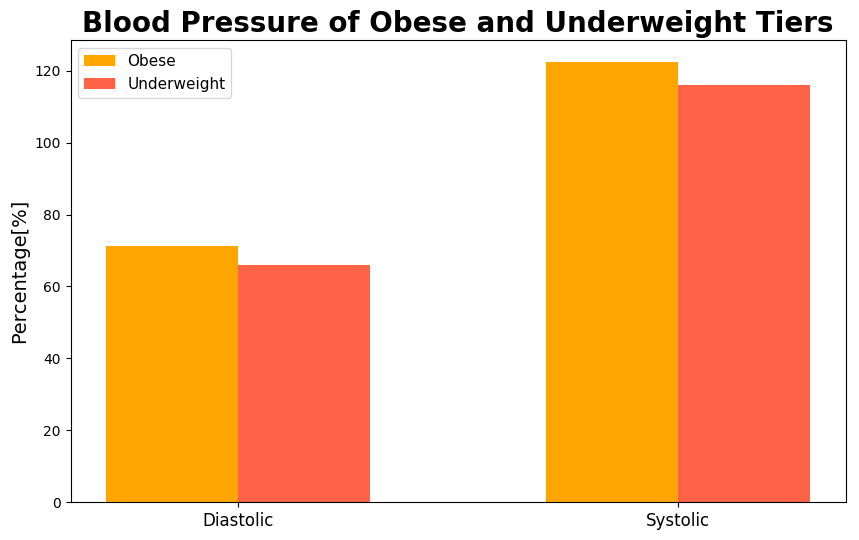

In [153]:
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, y_value1, width, label='Obese', color='orange')
ax.bar(x + width/2, y_value2, width, label='Underweight', color='tomato')




ax.set_ylabel('Percentage[%]', fontsize=14)
ax.set_xlabel('', fontsize=14)
ax.set_title('Blood Pressure of Obese and Underweight Tiers',fontsize=20, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=11)


plt.show()